#### Project Goals

##### . To be able to discover when each event is perfomed.
##### . To know the particular event that people like to engage with the most.
##### . Trace when some each event is engaged the most.
##### . Reduce churn to the bearest minimum.
##### . To predict the possibility of next event.
##### . To construct time series indicators of their engagement.

#### Some areas to carry out analysis
##### • What events are most common?
##### • What events are least common?
##### • Get the account_id with the highest number of events.
##### • Get the account_id with the least number of events.
##### • How many times events occurred based on different times of the day
##### • Do events happen equally at different times of the day or are there patterns (give visualizations)?
##### • Analyze “a particular account_id” for insights on how the person uses the service at different times of the day (Visualizations)?
##### • Are there any gaps(missing data) in the record of any events?
##### • Are there any extreme outliers (class imbalances) in the number of events
##### .Fix bad data
##### • Correct any missing data/gaps
##### • Fix class imbalance in the “events”

### Here is the breakdown of the information in each column: 
##### • account_id: This column contains a unique identifier for each user who performed an event. 
##### • event_time: This column indicates the time at which each event occurred. The times are given in a format that includes hours, minutes, and seconds. 
##### • event_type: This column specifies the type of event that occurred. Examples of possible event types in this table are: 
##### • DashboardLivebookLinkOpened: A user opened a link to a livebook from their dashboard. 
##### • ReadingOwnedBook: A user started or continued reading a book they own. 
##### • ProductTocLivebookLinkOpened: A user opened a link to a livebook from a product table of contents. 
##### • ReadingOpenChapter: A user opened a specific chapter of a book they are reading. 
##### • product_id: This corresponds with the event_type. 
##### • additional_data: This metric may not be needed in this project. In a live production environment, you will most likely deal with event data stored in a database or data warehouse. It is usually much easier to prepare such data for analysis by transforming it inside the database rather than extracting it and then processing all the raw data on your local computer (if the data is big, that would be impossible).

In [1]:
#Let's import the needed libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()


In [2]:
#Let's call in the file you're working with.
data = pd.read_csv("actions2load.csv")

In [3]:
#Let's showing the first five rows of your dataset
data.head()

,account_id,event_time,event_type,product_id,additional_data
0,608aa5969cef2edc29cb0c46deaec9da,2019-11-29 12:10:08.154,DashboardLivebookLinkOpened,1156,/book/learn-dbatools-in-a-month-of-lunches
1,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:10:19.962,ReadingOwnedBook,610,60s
2,b7d5902d66127909d0f9d766a841ebb5,2019-11-29 12:11:20.707,ReadingOwnedBook,1172,480s
3,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:11:41.283,ProductTocLivebookLinkOpened,1066,/book/grokking-machine-learning/chapter-1
4,89f7601cb558e1c47b00a7fabb6a466c,2019-11-29 12:11:58.253,ReadingOwnedBook,1073,960s


In [4]:
#Let's know the shape or size of your dataset
data.shape

(3242076, 5)

In [5]:
#Let's know your dataset columns
data.columns

Index(['account_id', 'event_time', 'event_type', 'product_id',
       'additional_data'],
      dtype='object')

In [6]:
#Let's know your data types and get familiarise with the data to know how to work with them.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3242076 entries, 0 to 3242075
Data columns (total 5 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   account_id       object
 1   event_time       object
 2   event_type       object
 3   product_id       int64 
 4   additional_data  object
dtypes: int64(1), object(4)
memory usage: 123.7+ MB


In [7]:
#Let's check for misssing value and we have the additional_data column having lots of missing values
data.isnull().sum()

account_id              0
event_time              0
event_type              0
product_id              0
additional_data    516123
dtype: int64

In [8]:
#Let's quantify the percentage of missing values in each variable
data.isnull().mean()

account_id         0.000000
event_time         0.000000
event_type         0.000000
product_id         0.000000
additional_data    0.159195
dtype: float64

Text(0.5, 1.0, 'Checking for missing data')

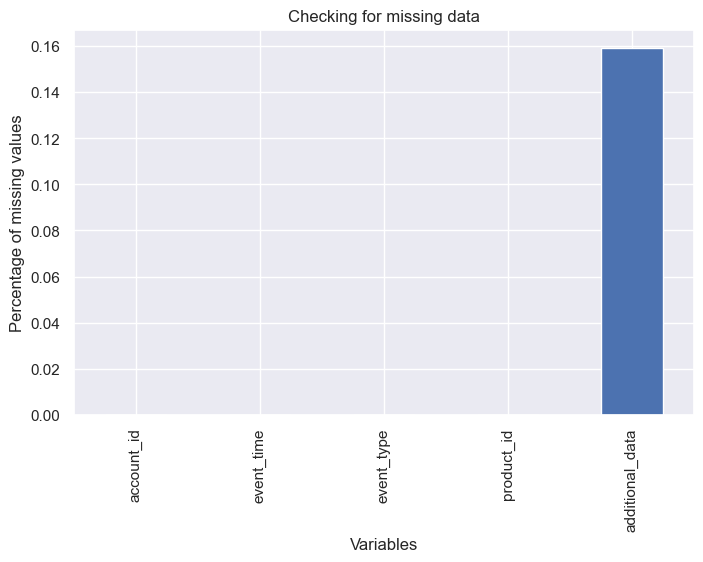

In [9]:
# Let's make a bar plot to vitualise the missing values in a variables, to have a vitual understanding of the missing 
#values in the dataset:
data.isnull().mean().plot.bar(figsize=(8,5))
plt.ylabel("Percentage of missing values")
plt.xlabel("Variables")
plt.title("Checking for missing data")

In [10]:
#Now let's drop the additrional_data column because we don't need it for this project.
data = data.drop("additional_data",axis=1)

In [11]:
#Let's check if missing value is gone, we can see that the additional_data column has been dropped.
data.isnull().sum()

account_id    0
event_time    0
event_type    0
product_id    0
dtype: int64

In [12]:
#Let's show the number of rows and columns in the datset, we can see that the number of our column has reduced from 5 to 4.
data.shape

(3242076, 4)

In [13]:
#Let's check our table to confirm that the additional_data is dropped.
data.head()

,account_id,event_time,event_type,product_id
0,608aa5969cef2edc29cb0c46deaec9da,2019-11-29 12:10:08.154,DashboardLivebookLinkOpened,1156
1,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:10:19.962,ReadingOwnedBook,610
2,b7d5902d66127909d0f9d766a841ebb5,2019-11-29 12:11:20.707,ReadingOwnedBook,1172
3,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:11:41.283,ProductTocLivebookLinkOpened,1066
4,89f7601cb558e1c47b00a7fabb6a466c,2019-11-29 12:11:58.253,ReadingOwnedBook,1073


In [14]:
#Let's check for the unique values in event_type columns
data["event_type"].unique()

array(['DashboardLivebookLinkOpened', 'ReadingOwnedBook',
       'ProductTocLivebookLinkOpened', 'ReadingOpenChapter',
       'HighlightCreated', 'BookmarkCreated', 'ReadingFreePreview',
       'ProductLookInsideLivebookLinkOpened', 'SearchResultOpened',
       'SearchMade', 'ProductLiveaudioUpsell', 'WishlistItemAdded',
       'OrderConfirmationLivebookLinkOpened', 'CrossReferenceTermOpened',
       'ExerciseSolved', 'UpvoteGiven', 'ShareableLinkOpened',
       'ShareableLinkCreated', 'NoteCreated', 'ProductSeeFreeLinkOpened',
       'LivebookLogin', 'EBookDownloaded', 'EBookRegistration',
       'FreeContentCheckout', 'UnknownOriginLivebookLinkOpened',
       'AddProductOffering', 'RemoveProductOffering', 'AddOrUpdateCoupon',
       'GoToManningShoppingCart', 'FirstManningAccess',
       'FirstLivebookAccess', 'LivebookRegistration',
       'LivebookAccountConfirmation', 'SherlockHolmesClueFound',
       'CommentCreated'], dtype=object)

In [15]:
#Let's know the unique value in event_type columns in there pecentage %
data["event_type"].value_counts(normalize=True)

ReadingOwnedBook                       2.307966e-01
FirstLivebookAccess                    2.030261e-01
FirstManningAccess                     2.027528e-01
EBookDownloaded                        8.554889e-02
ReadingFreePreview                     4.262608e-02
HighlightCreated                       3.752010e-02
FreeContentCheckout                    3.583599e-02
ReadingOpenChapter                     3.084567e-02
ProductTocLivebookLinkOpened           2.718320e-02
LivebookLogin                          1.927284e-02
DashboardLivebookLinkOpened            1.490033e-02
WishlistItemAdded                      1.160028e-02
CrossReferenceTermOpened               1.051610e-02
SearchMade                             8.593568e-03
SearchResultOpened                     7.472990e-03
ProductLookInsideLivebookLinkOpened    7.090210e-03
BookmarkCreated                        3.362043e-03
EBookRegistration                      2.727265e-03
LivebookRegistration                   2.375638e-03
LivebookAcco

In [16]:
#Let's count the number of each values in the "event_type" column
data["event_type"].value_counts()

ReadingOwnedBook                       748260
FirstLivebookAccess                    658226
FirstManningAccess                     657340
EBookDownloaded                        277356
ReadingFreePreview                     138197
HighlightCreated                       121643
FreeContentCheckout                    116183
ReadingOpenChapter                     100004
ProductTocLivebookLinkOpened            88130
LivebookLogin                           62484
DashboardLivebookLinkOpened             48308
WishlistItemAdded                       37609
CrossReferenceTermOpened                34094
SearchMade                              27861
SearchResultOpened                      24228
ProductLookInsideLivebookLinkOpened     22987
BookmarkCreated                         10900
EBookRegistration                        8842
LivebookRegistration                     7702
LivebookAccountConfirmation              7309
ExerciseSolved                           6971
OrderConfirmationLivebookLinkOpene

In [17]:
#Let's create a variable name for the value_counts action so that we can use the result for vitualization.
first_count = data["event_type"].value_counts()

In [18]:
#Let's frame the result and put in a dataframe.
first_count = first_count.to_frame().reset_index()

In [19]:
#Let's create a cloumn name for the dataframe
first_count.columns = ["Categories","count"]

In [20]:
#let's call the result
first_count

,Categories,count
0,ReadingOwnedBook,748260
1,FirstLivebookAccess,658226
2,FirstManningAccess,657340
3,EBookDownloaded,277356
4,ReadingFreePreview,138197
5,HighlightCreated,121643
6,FreeContentCheckout,116183
7,ReadingOpenChapter,100004
8,ProductTocLivebookLinkOpened,88130
9,LivebookLogin,62484


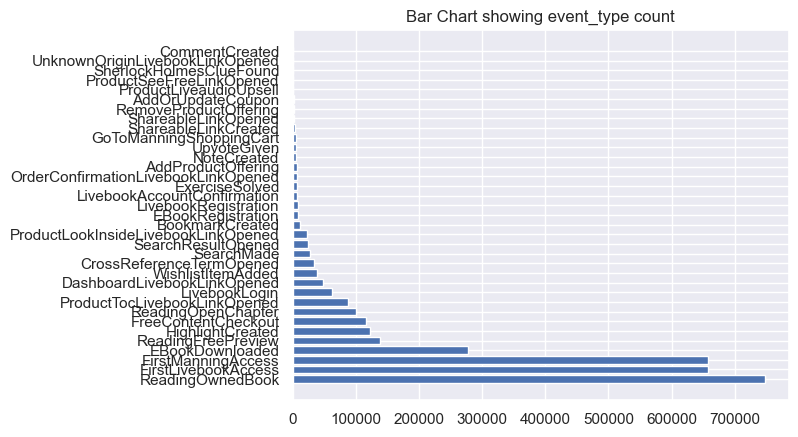

In [21]:
#let's plot a bar chart from the result for vitualization
x = first_count["Categories"]
y = first_count["count"]

plt.barh(x,y)
plt.title("Bar Chart showing event_type count")
plt.show()

In [22]:
#Let's Investigate the Cardinality of Categorical Variables
#Replacing the empty strings with NaN values in case there is any since we're dealing with a very large data and inspect the first five rows of the data:
data = data.replace(" ", np.nan)
data.head(6)

,account_id,event_time,event_type,product_id
0,608aa5969cef2edc29cb0c46deaec9da,2019-11-29 12:10:08.154,DashboardLivebookLinkOpened,1156
1,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:10:19.962,ReadingOwnedBook,610
2,b7d5902d66127909d0f9d766a841ebb5,2019-11-29 12:11:20.707,ReadingOwnedBook,1172
3,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:11:41.283,ProductTocLivebookLinkOpened,1066
4,89f7601cb558e1c47b00a7fabb6a466c,2019-11-29 12:11:58.253,ReadingOwnedBook,1073
5,eaecfa7b11e62308832d07ac94dcda6a,2019-11-29 12:12:00.402,ReadingOwnedBook,887


Text(0.5, 1.0, 'Cardinality')

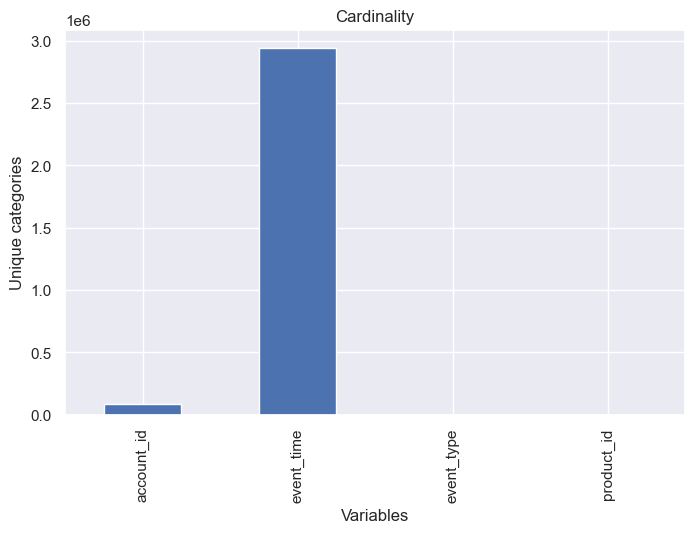

In [23]:
#Let's make a plot with the cardinality of each variable:
data.nunique().plot.bar(figsize=(8,5))
plt.ylabel("Unique categories")
plt.xlabel("Variables")
plt.title("Cardinality")

## Note;
#We can see that event time have the higest number of cardinality; this is because it has to do with time and there is
#always change in time every seconds.

In [24]:
#Checking for Rare Categories:
#Calculate the number of events per category of the "event_type" variable and 
#then divide them by the total number of events in the dataset to obtain the percentage of "event_type" per category. 
#We will call out the result:

#Percentage of "event_type" per category expressed as decimals:=
rare_cat = data["event_type"].value_counts() / len(data)
rare_cat

ReadingOwnedBook                       2.307966e-01
FirstLivebookAccess                    2.030261e-01
FirstManningAccess                     2.027528e-01
EBookDownloaded                        8.554889e-02
ReadingFreePreview                     4.262608e-02
HighlightCreated                       3.752010e-02
FreeContentCheckout                    3.583599e-02
ReadingOpenChapter                     3.084567e-02
ProductTocLivebookLinkOpened           2.718320e-02
LivebookLogin                          1.927284e-02
DashboardLivebookLinkOpened            1.490033e-02
WishlistItemAdded                      1.160028e-02
CrossReferenceTermOpened               1.051610e-02
SearchMade                             8.593568e-03
SearchResultOpened                     7.472990e-03
ProductLookInsideLivebookLinkOpened    7.090210e-03
BookmarkCreated                        3.362043e-03
EBookRegistration                      2.727265e-03
LivebookRegistration                   2.375638e-03
LivebookAcco

Text(0.5, 1.0, 'Rare Categories')

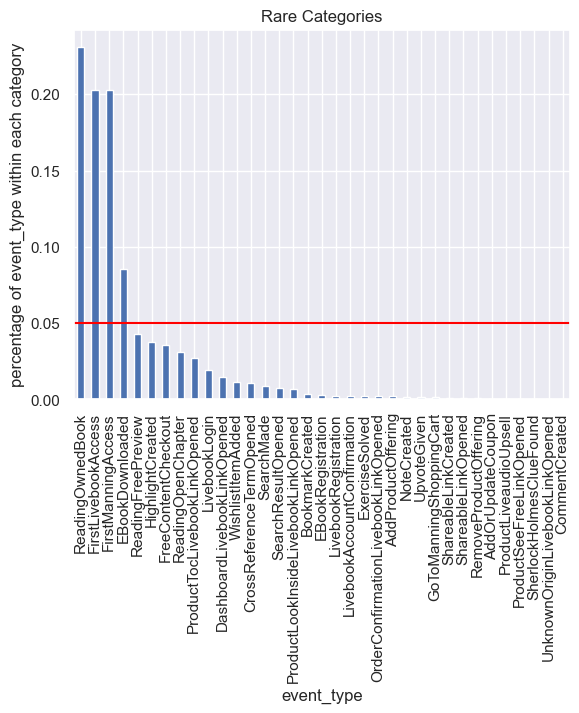

In [25]:
#Make a bar plot showing the frequency of each category 
#and highlight the 5% mark with a red line:all the values that falls below the red line are considered as rare categories

fig = rare_cat.sort_values(ascending=False).plot.bar()
fig.axhline(y=0.05, color="red")
fig.set_ylabel("percentage of event_type within each category")
fig.set_xlabel("event_type")
fig.set_title("Rare Categories")

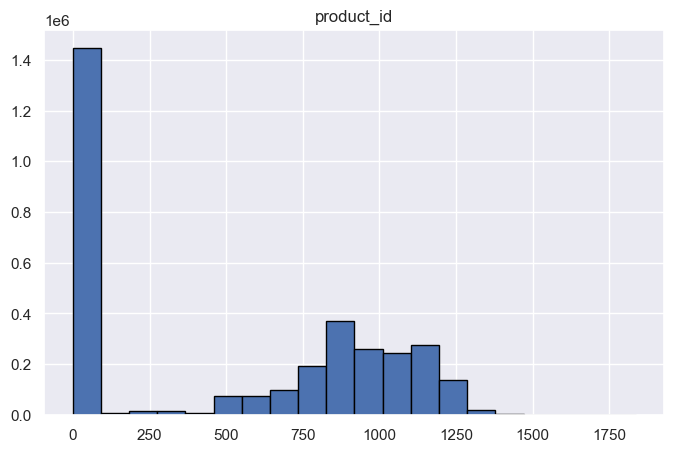

In [26]:
#Let's check the distribution of all numerical variables
data.hist(figsize=(8, 5), bins=20, edgecolor="black")
plt.subplots_adjust(hspace=0.5, wspace=0.3)

In [27]:
#using .describe() to determine the some statistical values for categorical variable
var_needed = ["event_time", "event_type"]
data[var_needed].describe()

,event_time,event_type
count,3242076,3242076
unique,2940583,35
top,2020-05-25 21:06:11.342,ReadingOwnedBook
freq,11,748260


In [28]:
#using .descrobe to determine some statistical values of the numerical variable
var_needed2 = ["product_id"]
data[var_needed2].describe()

,product_id
count,3.242076e+06
mean,5.153777e+02
std,4.912778e+02
min,-1.000000e+00
25%,-1.000000e+00
50%,6.130000e+02
75%,9.710000e+02
max,1.838000e+03


Text(0.5, 1.0, 'Checking for outliers')

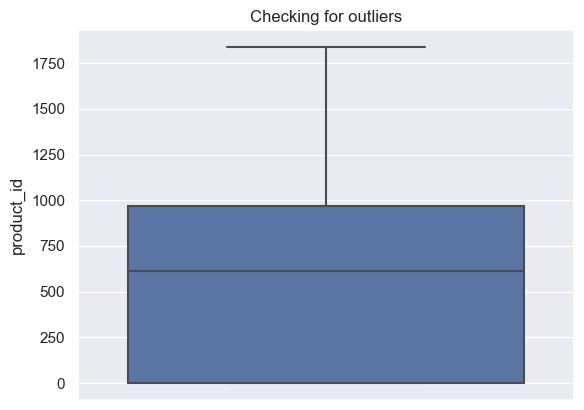

In [29]:
#Boxplot to examine outlier on numerical variable
sns.boxplot(y=data["product_id"])
plt.title("Checking for outliers")

In [30]:
#Lets know the value_counts of the product_id variable.
data["product_id"].value_counts()

-1       1417551
 869       41300
 880       40625
 803       37171
 882       35500
          ...   
 1344          1
 130           1
 66            1
 327           1
 207           1
Name: product_id, Length: 740, dtype: int64

In [31]:
#Let's frame the result in a dataframe
prod_count = data["product_id"].value_counts().to_frame()
prod_count

,product_id
-1,1417551
869,41300
880,40625
803,37171
882,35500
...,...
1344,1
130,1
66,1
327,1


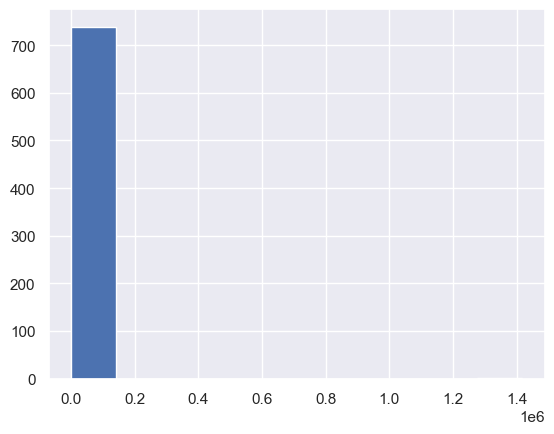

In [32]:
#plot a histogram of the distribution of the number of "product_id"
plt.hist(prod_count["product_id"])
plt.show()

In [33]:
#Let's know the value count of the account_id column.
data["account_id"].value_counts()

6bb61e3b7bce0931da574d19d1d82c88    1371593
86c876e217ae1ca1cd2986c5521a9768      17357
0c2a23a1ce63aa22296072df5cd065f7       5697
954c5420b7247345858b62c84d606bb7       5690
4de78691553567a9b9e20fde6667773b       4890
                                     ...   
8a831a7856dc0da98c6be48f705dcce8          1
155487ef76edc522f21a6fb177eaed78          1
bb7c0b0484f1908b7d85520a0429a826          1
b615e5a363163bc167b877cf34037568          1
3519f4939d54c1911afa74226a78c3f9          1
Name: account_id, Length: 89467, dtype: int64

In [34]:
#frame the result in a dataframe
acct_count = data["account_id"].value_counts().to_frame()
acct_count

,account_id
6bb61e3b7bce0931da574d19d1d82c88,1371593
86c876e217ae1ca1cd2986c5521a9768,17357
0c2a23a1ce63aa22296072df5cd065f7,5697
954c5420b7247345858b62c84d606bb7,5690
4de78691553567a9b9e20fde6667773b,4890
...,...
8a831a7856dc0da98c6be48f705dcce8,1
155487ef76edc522f21a6fb177eaed78,1
bb7c0b0484f1908b7d85520a0429a826,1
b615e5a363163bc167b877cf34037568,1


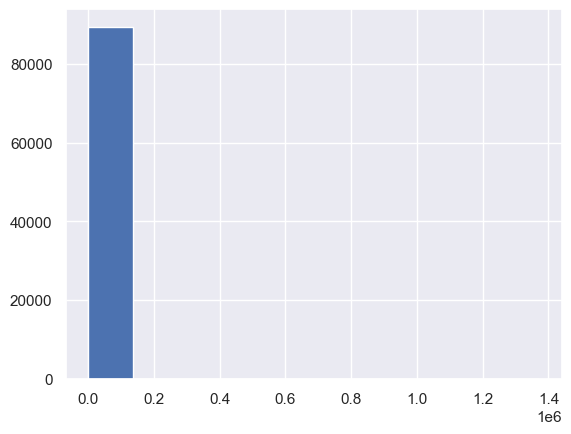

In [35]:
#plot a histogram of the distribution of the number of "account_id"
plt.hist(acct_count["account_id"])
plt.show()

In [36]:
#Let's convert event_time column to datetime format
data["event_time"]=pd.to_datetime(data["event_time"])

In [37]:
#Let's create a new column showing the day of events
data["event_day"] = data["event_time"].dt.day_name()

In [38]:
#Let's count the events that occur per day
event_days = data["event_day"].value_counts()

In [39]:
#create a dataframe
event_days = event_days.to_frame()
event_days

,event_day
Monday,511433
Tuesday,506717
Wednesday,500201
Thursday,487364
Friday,458720
Sunday,415440
Saturday,362201


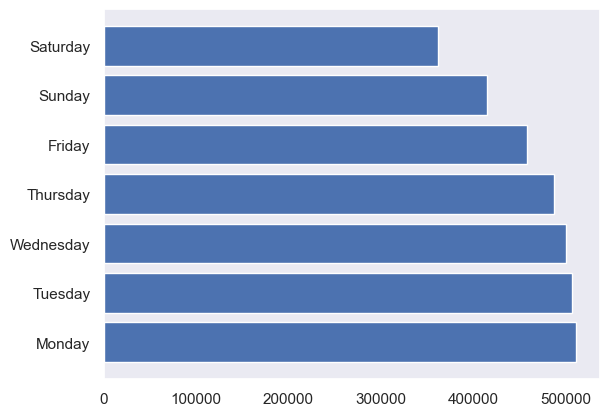

In [40]:
#plot a bar chart from the result
x = event_days.index
y = event_days["event_day"]

plt.barh(x,y)
plt.grid()

In [41]:
#Create a new column showing the hours of events
data["event_hours"] = data["event_time"].dt.hour

In [42]:
#Let's check the unique values of the hours to see if we have 24 hours.
data["event_hours"].unique()

array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,  0,  1,  2,  3,  4,
        5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [43]:
#Let's check the number of the unique values in event_hours to see if its 24 hours
data["event_hours"].nunique()

24

In [44]:
#To check the value_counts
data["event_hours"].value_counts()

14    178815
15    175232
13    168844
16    164146
17    154538
12    152400
19    150504
18    149507
20    145356
9     140293
11    140214
10    139052
8     136298
21    135902
7     132807
0     124535
6     116446
22    115755
1     110457
2     107778
5     106103
3     102092
4      97886
23     97116
Name: event_hours, dtype: int64

In [45]:
event_time = data["event_hours"].value_counts().to_frame().reset_index()
event_time.columns = ["event_hours", "count"]
event_time

,event_hours,count
0,14,178815
1,15,175232
2,13,168844
3,16,164146
4,17,154538
5,12,152400
6,19,150504
7,18,149507
8,20,145356
9,9,140293


In [46]:
event_time = event_time.sort_values(by ="event_hours")
event_time.reset_index(drop = True)

,event_hours,count
0,0,124535
1,1,110457
2,2,107778
3,3,102092
4,4,97886
5,5,106103
6,6,116446
7,7,132807
8,8,136298
9,9,140293


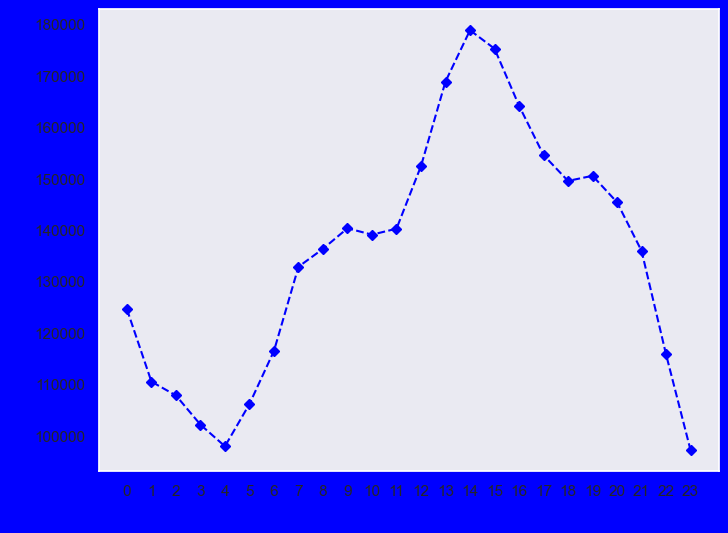

In [97]:
#create a line graph from the result for vitualization.
x = event_time["event_hours"]
y = event_time["count"]

plt.figure(figsize = (8,6), facecolor = "blue")
plt.plot(x,y, c = "blue", ls = "dashed" , marker = "D", ms = 5)
plt.xticks(list(range(24)))
plt.xlabel("events in a day", fontsize = 15, c = "blue")
plt.ylabel("Count of event", fontsize = 15, c = "blue")
plt.grid()

In [49]:
data["event_year"].unique()

array([2019, 2020], dtype=int64)

In [50]:
data["event_year"].unique()

array([2019, 2020], dtype=int64)

In [51]:
event_years = data["event_year"].value_counts()

In [52]:
event_years = event_years.to_frame()
event_years

,event_year
2020,2938654
2019,303422


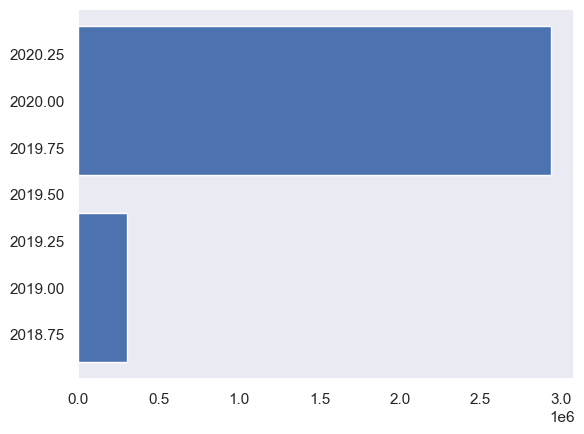

In [53]:
#plot a bar chart from the result
x = event_years.index
y = event_years["event_year"]

plt.barh(x,y)
plt.grid()

In [54]:
#to know the year of engagement 
data["year_duration"] = 2023 - data["event_year"]

In [55]:
data["year_duration"].value_counts()

3    2938654
4     303422
Name: year_duration, dtype: int64

In [56]:
#Create a new column showing the month of events
data["event_month"] = data["event_time"].dt.month_name()

In [57]:
data["event_month"].unique()

array(['November', 'December', 'January', 'February', 'March', 'April',
       'May', 'June'], dtype=object)

In [58]:
data["event_month"].nunique()

8

In [59]:
event_months = data["event_month"].value_counts()
event_months

April       946620
May         811680
March       569745
December    296113
January     267102
February    264952
June         78555
November      7309
Name: event_month, dtype: int64

In [60]:
event_months = event_months.to_frame()
event_months

,event_month
April,946620
May,811680
March,569745
December,296113
January,267102
February,264952
June,78555
November,7309


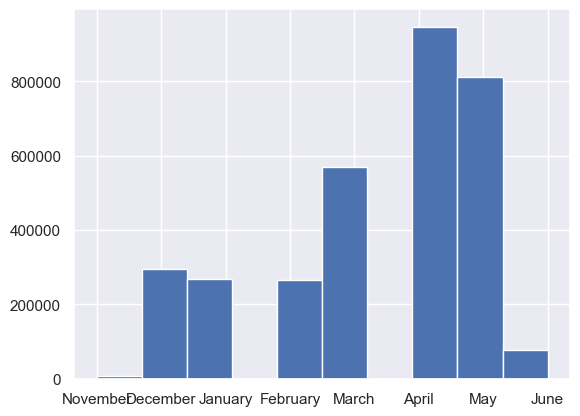

In [61]:
#plot a histogram of the distribution of the number of event in a month
plt.hist(data["event_month"])
plt.show()

In [62]:
#Let's create a filter when the event days is monday
data["event_day"] == "Monday"

0          False
1          False
2          False
3          False
4          False
           ...  
3242071    False
3242072    False
3242073    False
3242074    False
3242075    False
Name: event_day, Length: 3242076, dtype: bool

In [63]:
data.head()

,account_id,event_time,event_type,product_id,event_day,event_hours,event_year,year_duration,event_month
0,608aa5969cef2edc29cb0c46deaec9da,2019-11-29 12:10:08.154,DashboardLivebookLinkOpened,1156,Friday,12,2019,4,November
1,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:10:19.962,ReadingOwnedBook,610,Friday,12,2019,4,November
2,b7d5902d66127909d0f9d766a841ebb5,2019-11-29 12:11:20.707,ReadingOwnedBook,1172,Friday,12,2019,4,November
3,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:11:41.283,ProductTocLivebookLinkOpened,1066,Friday,12,2019,4,November
4,89f7601cb558e1c47b00a7fabb6a466c,2019-11-29 12:11:58.253,ReadingOwnedBook,1073,Friday,12,2019,4,November


In [64]:
#Using a time periods function to create the time period of each event

def TimePeriod(event_hours):
    if 0 < event_hours < 6:
        period = "Early hours"
    elif 5 < event_hours < 12:
        period = "Morning"
    elif 11 < event_hours < 17:
        period = "Afternoon"
    elif 16 < event_hours < 20:
        period = "Evening"
    else:
        period = "Night"
    return period

In [65]:
#Let's apply the function we created and use it on all the dataset
data["period of day"] = data["event_hours"].apply(TimePeriod)

In [66]:
#Let's call out the result
data["period of day"]

0            Afternoon
1            Afternoon
2            Afternoon
3            Afternoon
4            Afternoon
              ...     
3242071    Early hours
3242072    Early hours
3242073    Early hours
3242074    Early hours
3242075    Early hours
Name: period of day, Length: 3242076, dtype: object

In [67]:
data.head()

,account_id,event_time,event_type,product_id,event_day,event_hours,event_year,year_duration,event_month,period of day
0,608aa5969cef2edc29cb0c46deaec9da,2019-11-29 12:10:08.154,DashboardLivebookLinkOpened,1156,Friday,12,2019,4,November,Afternoon
1,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:10:19.962,ReadingOwnedBook,610,Friday,12,2019,4,November,Afternoon
2,b7d5902d66127909d0f9d766a841ebb5,2019-11-29 12:11:20.707,ReadingOwnedBook,1172,Friday,12,2019,4,November,Afternoon
3,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:11:41.283,ProductTocLivebookLinkOpened,1066,Friday,12,2019,4,November,Afternoon
4,89f7601cb558e1c47b00a7fabb6a466c,2019-11-29 12:11:58.253,ReadingOwnedBook,1073,Friday,12,2019,4,November,Afternoon


In [68]:
data.shape

(3242076, 10)

In [69]:
data["period of day"].value_counts()

Afternoon      839437
Morning        805110
Night          618664
Early hours    524316
Evening        454549
Name: period of day, dtype: int64

In [70]:
p_of_day = data["period of day"].value_counts().to_frame().reset_index()
p_of_day.columns = ["period of day", "counts"]
p_of_day

,period of day,counts
0,Afternoon,839437
1,Morning,805110
2,Night,618664
3,Early hours,524316
4,Evening,454549


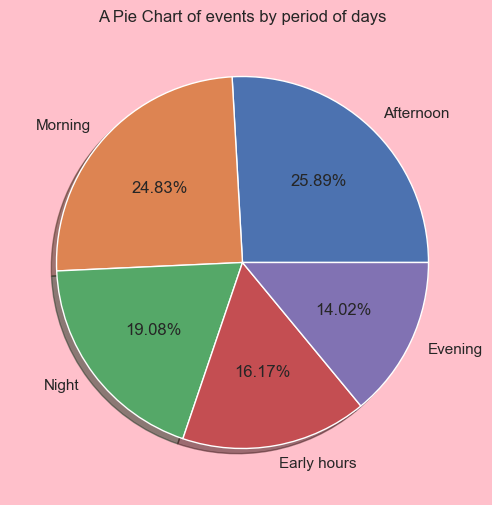

In [71]:
#plot a pie chart to give proper vitualization of the result
plt.figure(figsize=(6,8), facecolor = "pink")
plt.pie(p_of_day["counts"],labels=p_of_day["period of day"], explode= [0.0,0.0,0.0,0.0,0.0], autopct='%1.2f%%', shadow = True)
plt.title("A Pie Chart of events by period of days")
plt.show()

In [72]:
#to know the hours spent on event using groupby on the period of day and the event_hours.
data.groupby("period of day")["event_hours"].mean().to_frame()

,event_hours
period of day,
Afternoon,14.035595
Early hours,2.964525
Evening,17.991125
Morning,8.587920
Night,17.038877


Text(0.5, 1.0, 'time_spent')

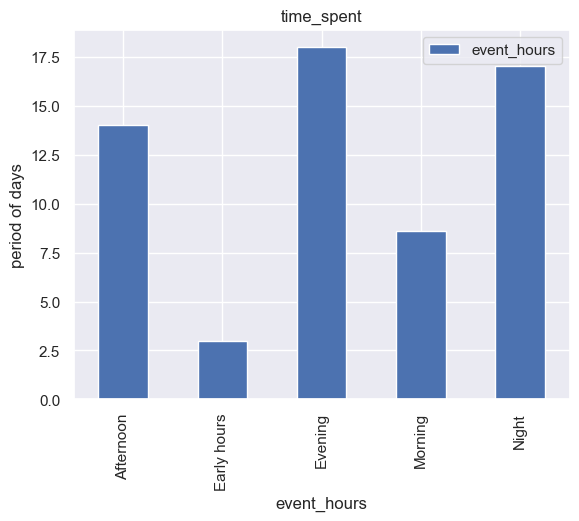

In [73]:
#plot a bar graph to show result 
fig = data.groupby("period of day")["event_hours"].mean().to_frame().plot.bar()
fig.set_ylabel("period of days")
fig.set_xlabel("event_hours")
fig.set_title("time_spent")

In [74]:
#Using groupby to know the event days and hours spent
data.groupby("event_day")["event_hours"].mean().to_frame()

,event_hours
event_day,
Friday,11.921854
Monday,11.985222
Saturday,12.102369
Sunday,12.482253
Thursday,11.771571
Tuesday,11.937210
Wednesday,12.027923


Text(0.5, 1.0, 'hours_spent')

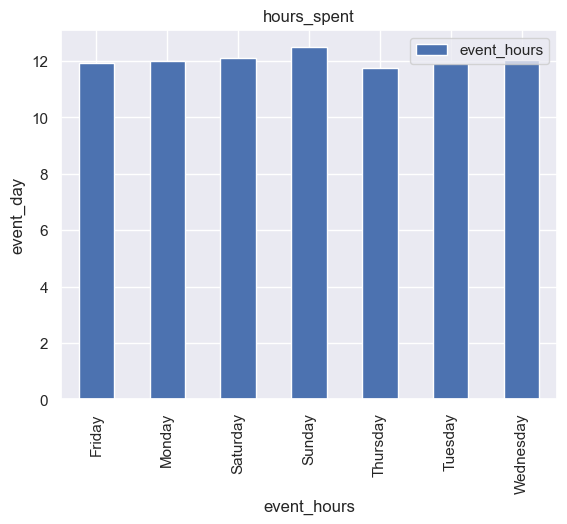

In [75]:
#plot a bar graph to show result
fig = data.groupby("event_day")["event_hours"].mean().to_frame().plot.bar()
fig.set_ylabel("event_day")
fig.set_xlabel("event_hours")
fig.set_title("hours_spent")

In [76]:
#Let's check those who perform an event and the day they performed it using crosstab
pd.crosstab(data["account_id"], data["event_day"], margins = True)

event_day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,All
account_id,,,,,,,,
00003e3b9e5336685200ae85d21b4f5e,0,0,0,1,0,0,0,1
000163671e7b29522ad47604f3b48cca,2,1,0,0,0,0,0,3
00016ce8de4934b8fd5fd7e12f3cd0a9,4,0,0,0,0,0,1,5
000183d7295b5898359736f76320843f,0,0,0,0,1,0,0,1
0001b5d2fd33d5b98539d39658d69a90,11,0,0,0,0,7,0,18
...,...,...,...,...,...,...,...,...
fffe12a49f485f6e4c420a46fd18a0ae,0,1,6,0,0,0,0,7
fffe8ed7af572cefb1fe4fbb86b0204a,0,30,0,3,0,31,0,64
fffeba00a8c754f225bd9e707a1f224b,0,0,2,0,4,0,0,6


In [77]:
#Let's check the events that occur in the days and what time of the day they occur
pd.crosstab(data["period of day"], data["event_day"], margins =True)

event_day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,All
period of day,,,,,,,,
Afternoon,118394,130949,91508,116625,121056,132542,128363,839437
Early hours,73261,83076,59983,61334,83335,82121,81206,524316
Evening,63716,71197,51559,60079,67434,70878,69686,454549
Morning,120120,128252,85646,92710,123427,129177,125778,805110
Night,83229,97959,73505,84692,92112,91999,95168,618664
All,458720,511433,362201,415440,487364,506717,500201,3242076


In [78]:
#Let's check the events that occur in the month and what time of the year they occur
pd.crosstab(data["event_year"], data["event_month"], margins =True)

event_month,April,December,February,January,June,March,May,November,All
event_year,,,,,,,,,
2019,0,296113,0,0,0,0,0,7309,303422
2020,946620,0,264952,267102,78555,569745,811680,0,2938654
All,946620,296113,264952,267102,78555,569745,811680,7309,3242076


Text(0.5, 1.0, 'event_month with values')

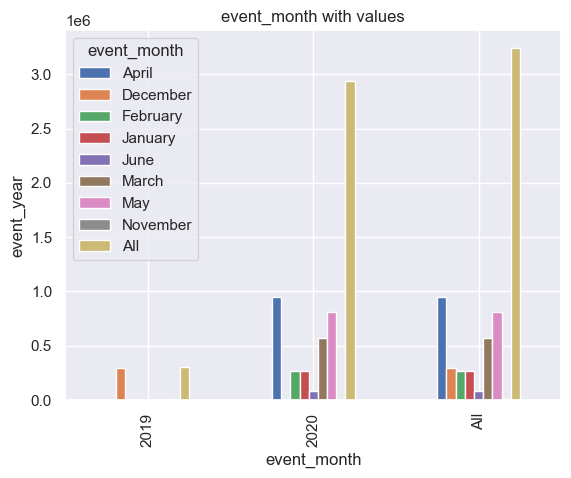

In [79]:
#plot a bar graph to show result
fig = pd.crosstab(data["event_year"], data["event_month"], margins =True).plot.bar()
fig.set_ylabel("event_year")
fig.set_xlabel("event_month")
fig.set_title("event_month with values")

Text(0.5, 1.0, 'event_day with values')

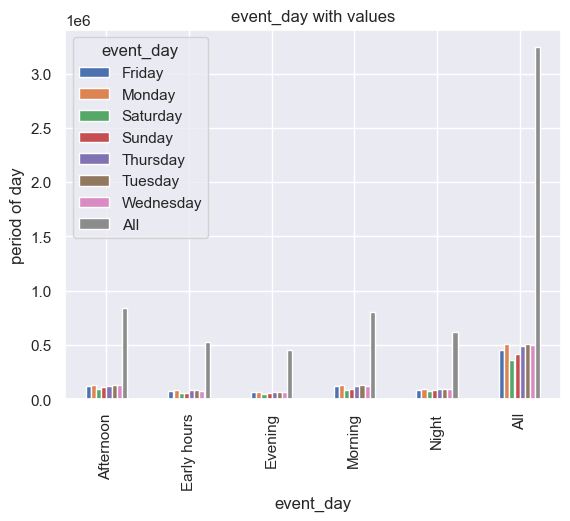

In [96]:
#plot a bar graph to show result
fig = pd.crosstab(data["period of day"], data["event_day"], margins =True).plot.bar()
fig.set_ylabel("period of day")
fig.set_xlabel("event_day")
fig.set_title("event_day with values")

In [81]:
#Let's know the type of event that people engaged in
pd.crosstab(data["account_id"], data["event_type"], margins =True)

event_type,AddOrUpdateCoupon,AddProductOffering,BookmarkCreated,CommentCreated,CrossReferenceTermOpened,DashboardLivebookLinkOpened,EBookDownloaded,EBookRegistration,ExerciseSolved,FirstLivebookAccess,...,RemoveProductOffering,SearchMade,SearchResultOpened,ShareableLinkCreated,ShareableLinkOpened,SherlockHolmesClueFound,UnknownOriginLivebookLinkOpened,UpvoteGiven,WishlistItemAdded,All
account_id,,,,,,,,,,,,,,,,,,,,,
00003e3b9e5336685200ae85d21b4f5e,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
000163671e7b29522ad47604f3b48cca,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3
00016ce8de4934b8fd5fd7e12f3cd0a9,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,5
000183d7295b5898359736f76320843f,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
0001b5d2fd33d5b98539d39658d69a90,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffe12a49f485f6e4c420a46fd18a0ae,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,7
fffe8ed7af572cefb1fe4fbb86b0204a,0,4,0,0,0,3,14,0,0,0,...,1,0,0,0,0,0,0,0,0,64
fffeba00a8c754f225bd9e707a1f224b,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,6


In [82]:
data.head()

,account_id,event_time,event_type,product_id,event_day,event_hours,event_year,year_duration,event_month,period of day
0,608aa5969cef2edc29cb0c46deaec9da,2019-11-29 12:10:08.154,DashboardLivebookLinkOpened,1156,Friday,12,2019,4,November,Afternoon
1,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:10:19.962,ReadingOwnedBook,610,Friday,12,2019,4,November,Afternoon
2,b7d5902d66127909d0f9d766a841ebb5,2019-11-29 12:11:20.707,ReadingOwnedBook,1172,Friday,12,2019,4,November,Afternoon
3,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:11:41.283,ProductTocLivebookLinkOpened,1066,Friday,12,2019,4,November,Afternoon
4,89f7601cb558e1c47b00a7fabb6a466c,2019-11-29 12:11:58.253,ReadingOwnedBook,1073,Friday,12,2019,4,November,Afternoon


In [83]:
cols = data.columns

In [84]:
columns = cols
columns

Index(['account_id', 'event_time', 'event_type', 'product_id', 'event_day',
       'event_hours', 'event_year', 'year_duration', 'event_month',
       'period of day'],
      dtype='object')

In [85]:
#Let's creating a table to consider the activity of an individual based on one account_id
df=np.array(['608aa5969cef2edc29cb0c46deaec9da','2019-11-29 12:10:08.154000','DashboardLivebookLinkOpened',1156,'Friday'
            ,12,2019,4, 'November', 'Afternoon']).reshape(1,-1)
df = pd.DataFrame(df,columns=cols)

In [86]:
df

,account_id,event_time,event_type,product_id,event_day,event_hours,event_year,year_duration,event_month,period of day
0,608aa5969cef2edc29cb0c46deaec9da,2019-11-29 12:10:08.154000,DashboardLivebookLinkOpened,1156,Friday,12,2019,4,November,Afternoon


In [87]:
df.shape

(1, 10)

In [88]:
acct1 = df.value_counts().to_frame().T
acct1

account_id,608aa5969cef2edc29cb0c46deaec9da
event_time,2019-11-29 12:10:08.154000
event_type,DashboardLivebookLinkOpened
product_id,1156
event_day,Friday
event_hours,12
event_year,2019
year_duration,4
event_month,November
period of day,Afternoon
0,1


In [89]:
diff_event_type = data["event_type"].unique()

In [90]:
diff_event_type

array(['DashboardLivebookLinkOpened', 'ReadingOwnedBook',
       'ProductTocLivebookLinkOpened', 'ReadingOpenChapter',
       'HighlightCreated', 'BookmarkCreated', 'ReadingFreePreview',
       'ProductLookInsideLivebookLinkOpened', 'SearchResultOpened',
       'SearchMade', 'ProductLiveaudioUpsell', 'WishlistItemAdded',
       'OrderConfirmationLivebookLinkOpened', 'CrossReferenceTermOpened',
       'ExerciseSolved', 'UpvoteGiven', 'ShareableLinkOpened',
       'ShareableLinkCreated', 'NoteCreated', 'ProductSeeFreeLinkOpened',
       'LivebookLogin', 'EBookDownloaded', 'EBookRegistration',
       'FreeContentCheckout', 'UnknownOriginLivebookLinkOpened',
       'AddProductOffering', 'RemoveProductOffering', 'AddOrUpdateCoupon',
       'GoToManningShoppingCart', 'FirstManningAccess',
       'FirstLivebookAccess', 'LivebookRegistration',
       'LivebookAccountConfirmation', 'SherlockHolmesClueFound',
       'CommentCreated'], dtype=object)

In [91]:
#Let's determine the activity that occur on each event type
occurence_time = data[data["event_type"]=="DashboardLivebookLinkOpened"]

In [92]:
occurence_time

,account_id,event_time,event_type,product_id,event_day,event_hours,event_year,year_duration,event_month,period of day
0,608aa5969cef2edc29cb0c46deaec9da,2019-11-29 12:10:08.154,DashboardLivebookLinkOpened,1156,Friday,12,2019,4,November,Afternoon
23,4df1703d18b1dc55c9f25259127e1979,2019-11-29 12:17:11.476,DashboardLivebookLinkOpened,1190,Friday,12,2019,4,November,Afternoon
25,ebe4b94115b94e6ceffaced2bf198944,2019-11-29 12:17:53.998,DashboardLivebookLinkOpened,1276,Friday,12,2019,4,November,Afternoon
81,756eaf7a606437a4294a0e2e806acf6e,2019-11-29 12:29:54.907,DashboardLivebookLinkOpened,1090,Friday,12,2019,4,November,Afternoon
192,ad3d418bcf2ed8d7722ba3c089582295,2019-11-29 12:49:10.986,DashboardLivebookLinkOpened,994,Friday,12,2019,4,November,Afternoon
...,...,...,...,...,...,...,...,...,...,...
3241480,74231dd39661e379c0af0ecf264e1054,2020-06-04 03:28:25.833,DashboardLivebookLinkOpened,803,Thursday,3,2020,3,June,Early hours
3241745,a067c353a6062c4a83311633744cd75f,2020-06-04 03:51:39.575,DashboardLivebookLinkOpened,650,Thursday,3,2020,3,June,Early hours
3241770,5d407e5d3d563c9f5179415a64b9bc40,2020-06-04 03:53:26.493,DashboardLivebookLinkOpened,995,Thursday,3,2020,3,June,Early hours
3241916,745f8f5564d5065ea18f0faf38e0b2ae,2020-06-04 04:07:54.231,DashboardLivebookLinkOpened,830,Thursday,4,2020,3,June,Early hours


In [93]:
data.head()

,account_id,event_time,event_type,product_id,event_day,event_hours,event_year,year_duration,event_month,period of day
0,608aa5969cef2edc29cb0c46deaec9da,2019-11-29 12:10:08.154,DashboardLivebookLinkOpened,1156,Friday,12,2019,4,November,Afternoon
1,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:10:19.962,ReadingOwnedBook,610,Friday,12,2019,4,November,Afternoon
2,b7d5902d66127909d0f9d766a841ebb5,2019-11-29 12:11:20.707,ReadingOwnedBook,1172,Friday,12,2019,4,November,Afternoon
3,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:11:41.283,ProductTocLivebookLinkOpened,1066,Friday,12,2019,4,November,Afternoon
4,89f7601cb558e1c47b00a7fabb6a466c,2019-11-29 12:11:58.253,ReadingOwnedBook,1073,Friday,12,2019,4,November,Afternoon


In [92]:
#Let's save the analyzed data
analyzed_data = data.to_csv("analyzed_data.csv", index = False, encoding = "utf8")

In [93]:
#Let's call in the analysed data to perform my modelling
new_data = pd.read_csv("analyzed_data.csv")
new_data.head()

,account_id,event_time,event_type,product_id,event_day,event_hours,event_year,year_duration,event_month,period of day
0,608aa5969cef2edc29cb0c46deaec9da,2019-11-29 12:10:08.154,DashboardLivebookLinkOpened,1156,Friday,12,2019,4,November,Afternoon
1,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:10:19.962,ReadingOwnedBook,610,Friday,12,2019,4,November,Afternoon
2,b7d5902d66127909d0f9d766a841ebb5,2019-11-29 12:11:20.707,ReadingOwnedBook,1172,Friday,12,2019,4,November,Afternoon
3,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:11:41.283,ProductTocLivebookLinkOpened,1066,Friday,12,2019,4,November,Afternoon
4,89f7601cb558e1c47b00a7fabb6a466c,2019-11-29 12:11:58.253,ReadingOwnedBook,1073,Friday,12,2019,4,November,Afternoon


In [94]:
#import the neccesary libraries needed for data fixing and modelling
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from feature_engine.encoding import CountFrequencyEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [95]:
#call in my data set for fixing and modelling
raw_data = pd.read_csv("analyzed_data.csv")
raw_data.head()

,account_id,event_time,event_type,product_id,event_day,event_hours,event_year,year_duration,event_month,period of day
0,608aa5969cef2edc29cb0c46deaec9da,2019-11-29 12:10:08.154,DashboardLivebookLinkOpened,1156,Friday,12,2019,4,November,Afternoon
1,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:10:19.962,ReadingOwnedBook,610,Friday,12,2019,4,November,Afternoon
2,b7d5902d66127909d0f9d766a841ebb5,2019-11-29 12:11:20.707,ReadingOwnedBook,1172,Friday,12,2019,4,November,Afternoon
3,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:11:41.283,ProductTocLivebookLinkOpened,1066,Friday,12,2019,4,November,Afternoon
4,89f7601cb558e1c47b00a7fabb6a466c,2019-11-29 12:11:58.253,ReadingOwnedBook,1073,Friday,12,2019,4,November,Afternoon


In [96]:
#remove columns that are not needed
raw_data.drop(
        ["account_id", "product_id"],
         axis=1, inplace=True
         ) 

In [97]:
#Let's create a lag to predict the previous event_time.
raw_data['lag 1'] = raw_data['event_time'].shift(1)
raw_data.head()

,event_time,event_type,event_day,event_hours,event_year,year_duration,event_month,period of day,lag 1
0,2019-11-29 12:10:08.154,DashboardLivebookLinkOpened,Friday,12,2019,4,November,Afternoon,NaN
1,2019-11-29 12:10:19.962,ReadingOwnedBook,Friday,12,2019,4,November,Afternoon,2019-11-29 12:10:08.154
2,2019-11-29 12:11:20.707,ReadingOwnedBook,Friday,12,2019,4,November,Afternoon,2019-11-29 12:10:19.962
3,2019-11-29 12:11:41.283,ProductTocLivebookLinkOpened,Friday,12,2019,4,November,Afternoon,2019-11-29 12:11:20.707
4,2019-11-29 12:11:58.253,ReadingOwnedBook,Friday,12,2019,4,November,Afternoon,2019-11-29 12:11:41.283


In [98]:
#Let's create a target column to predict the next event_time
raw_data['target'] = raw_data['event_time'].shift(-1)
raw_data.tail()

,event_time,event_type,event_day,event_hours,event_year,year_duration,event_month,period of day,lag 1,target
3242071,2020-06-04 04:19:56.485,FirstManningAccess,Thursday,4,2020,3,June,Early hours,2020-06-04 04:19:36.845,2020-06-04 04:19:56.486
3242072,2020-06-04 04:19:56.486,FirstLivebookAccess,Thursday,4,2020,3,June,Early hours,2020-06-04 04:19:56.485,2020-06-04 04:19:59.613
3242073,2020-06-04 04:19:59.613,FirstLivebookAccess,Thursday,4,2020,3,June,Early hours,2020-06-04 04:19:56.486,2020-06-04 04:19:59.612
3242074,2020-06-04 04:19:59.612,FirstManningAccess,Thursday,4,2020,3,June,Early hours,2020-06-04 04:19:59.613,2020-06-04 04:20:13.271
3242075,2020-06-04 04:20:13.271,ReadingOwnedBook,Thursday,4,2020,3,June,Early hours,2020-06-04 04:19:59.612,NaN


In [99]:
#In imputation, the imputation values should be calculated using the variables 
#in the train set; therefore, let's separate the raw_data into train and test sets and seperate the targets:

train,test = train_test_split(
     raw_data, test_size=0.3, 
    random_state=0)

In [100]:
train

,event_time,event_type,event_day,event_hours,event_year,year_duration,event_month,period of day,lag 1,target
76920,2019-12-09 08:42:05.664,EBookDownloaded,Monday,8,2019,4,December,Morning,2019-12-09 08:41:51.701,2019-12-09 08:42:08.304
196206,2019-12-20 12:28:15.806,EBookDownloaded,Friday,12,2019,4,December,Afternoon,2019-12-20 12:28:12.608,2019-12-20 12:28:28.390
2403977,2020-05-03 05:35:58.408,ReadingOwnedBook,Sunday,5,2020,3,May,Early hours,2020-05-03 05:35:53.622,2020-05-03 05:36:05.754
2739102,2020-05-15 04:27:44.987,LivebookLogin,Friday,4,2020,3,May,Early hours,2020-05-15 04:27:35.331,2020-05-15 04:27:45.379
2949852,2020-05-23 15:17:30.391,ReadingOwnedBook,Saturday,15,2020,3,May,Afternoon,2020-05-23 15:17:25.045,2020-05-23 15:17:48.809
...,...,...,...,...,...,...,...,...,...,...
2249467,2020-04-27 21:49:30.491,HighlightCreated,Monday,21,2020,3,April,Night,2020-04-27 21:49:25.334,2020-04-27 21:49:39.968
963395,2020-03-12 19:02:50.801,FirstManningAccess,Thursday,19,2020,3,March,Evening,2020-03-12 19:02:49.068,2020-03-12 19:02:50.801
2215104,2020-04-26 20:36:25.928,FirstLivebookAccess,Sunday,20,2020,3,April,Night,2020-04-26 20:36:25.926,2020-04-26 20:36:28.620
1484405,2020-04-03 19:38:13.228,FirstLivebookAccess,Friday,19,2020,3,April,Evening,2020-04-03 19:38:13.228,2020-04-03 19:38:22.032


In [101]:
test

,event_time,event_type,event_day,event_hours,event_year,year_duration,event_month,period of day,lag 1,target
2893938,2020-05-21 07:18:38.035,FirstLivebookAccess,Thursday,7,2020,3,May,Morning,2020-05-21 07:18:38.035,2020-05-21 07:18:48.886
2181282,2020-04-25 16:37:56.707,FirstLivebookAccess,Saturday,16,2020,3,April,Afternoon,2020-04-25 16:37:56.706,2020-04-25 16:38:01.530
3088225,2020-05-28 17:16:50.174,FirstManningAccess,Thursday,17,2020,3,May,Evening,2020-05-28 17:16:46.305,2020-05-28 17:16:50.174
507775,2020-01-24 01:50:17.589,ReadingOpenChapter,Friday,1,2020,3,January,Early hours,2020-01-24 01:49:56.551,2020-01-24 01:50:23.174
2179824,2020-04-25 15:46:27.103,ReadingOwnedBook,Saturday,15,2020,3,April,Afternoon,2020-04-25 15:46:24.405,2020-04-25 15:46:27.345
...,...,...,...,...,...,...,...,...,...,...
2197894,2020-04-26 07:20:09.889,ReadingOpenChapter,Sunday,7,2020,3,April,Morning,2020-04-26 07:20:06.829,2020-04-26 07:20:17.127
232431,2019-12-24 10:54:07.111,ExerciseSolved,Tuesday,10,2019,4,December,Morning,2019-12-24 10:54:05.611,2019-12-24 10:54:09.215
2622268,2020-05-11 05:19:17.313,LivebookLogin,Monday,5,2020,3,May,Early hours,2020-05-11 05:19:17.310,2020-05-11 05:19:19.598
1097075,2020-03-19 12:33:01.236,FirstManningAccess,Thursday,12,2020,3,March,Afternoon,2020-03-19 12:33:00.925,2020-03-19 12:33:01.236


In [102]:
#Let's drop index because the numbers are randomly selected and this would have affect the index arrangement.
train.reset_index(drop=True, inplace = True)
test.reset_index(drop=True, inplace = True)

In [103]:
train

,event_time,event_type,event_day,event_hours,event_year,year_duration,event_month,period of day,lag 1,target
0,2019-12-09 08:42:05.664,EBookDownloaded,Monday,8,2019,4,December,Morning,2019-12-09 08:41:51.701,2019-12-09 08:42:08.304
1,2019-12-20 12:28:15.806,EBookDownloaded,Friday,12,2019,4,December,Afternoon,2019-12-20 12:28:12.608,2019-12-20 12:28:28.390
2,2020-05-03 05:35:58.408,ReadingOwnedBook,Sunday,5,2020,3,May,Early hours,2020-05-03 05:35:53.622,2020-05-03 05:36:05.754
3,2020-05-15 04:27:44.987,LivebookLogin,Friday,4,2020,3,May,Early hours,2020-05-15 04:27:35.331,2020-05-15 04:27:45.379
4,2020-05-23 15:17:30.391,ReadingOwnedBook,Saturday,15,2020,3,May,Afternoon,2020-05-23 15:17:25.045,2020-05-23 15:17:48.809
...,...,...,...,...,...,...,...,...,...,...
2269448,2020-04-27 21:49:30.491,HighlightCreated,Monday,21,2020,3,April,Night,2020-04-27 21:49:25.334,2020-04-27 21:49:39.968
2269449,2020-03-12 19:02:50.801,FirstManningAccess,Thursday,19,2020,3,March,Evening,2020-03-12 19:02:49.068,2020-03-12 19:02:50.801
2269450,2020-04-26 20:36:25.928,FirstLivebookAccess,Sunday,20,2020,3,April,Night,2020-04-26 20:36:25.926,2020-04-26 20:36:28.620
2269451,2020-04-03 19:38:13.228,FirstLivebookAccess,Friday,19,2020,3,April,Evening,2020-04-03 19:38:13.228,2020-04-03 19:38:22.032


In [104]:
#Let's check the percentage of missing values in the train set:
train.isnull().mean()

event_time       0.000000e+00
event_type       0.000000e+00
event_day        0.000000e+00
event_hours      0.000000e+00
event_year       0.000000e+00
year_duration    0.000000e+00
event_month      0.000000e+00
period of day    0.000000e+00
lag 1            0.000000e+00
target           4.406348e-07
dtype: float64

In [105]:
#Now, let's impute missing values Implementing frequent category imputation using scikit-learn so that we can store learned parameters.
#Let's create a frequent category imputer with SimpleImputer() from scikit-learn:
imputer = SimpleImputer(strategy='most_frequent')

In [106]:
#Let's fit the imputer to the train set so that it learns the most frequent values:
imputer.fit(train)

SimpleImputer(strategy='most_frequent')

In [107]:
imputer.statistics_

array(['2020-04-11 19:05:24.552', 'ReadingOwnedBook', 'Monday', 14, 2020,
       3, 'April', 'Afternoon', '2020-02-16 09:02:34.838',
       '2020-01-26 11:43:14.827'], dtype=object)

In [108]:
#Let's replace missing values with frequent categories:
train = imputer.transform(train)
test = imputer.transform(test)

In [109]:
#Inspect the imputation
test

array([['2020-05-21 07:18:38.035', 'FirstLivebookAccess', 'Thursday',
        ..., 'Morning', '2020-05-21 07:18:38.035',
        '2020-05-21 07:18:48.886'],
       ['2020-04-25 16:37:56.707', 'FirstLivebookAccess', 'Saturday',
        ..., 'Afternoon', '2020-04-25 16:37:56.706',
        '2020-04-25 16:38:01.530'],
       ['2020-05-28 17:16:50.174', 'FirstManningAccess', 'Thursday', ...,
        'Evening', '2020-05-28 17:16:46.305', '2020-05-28 17:16:50.174'],
       ...,
       ['2020-05-11 05:19:17.313', 'LivebookLogin', 'Monday', ...,
        'Early hours', '2020-05-11 05:19:17.310',
        '2020-05-11 05:19:19.598'],
       ['2020-03-19 12:33:01.236', 'FirstManningAccess', 'Thursday', ...,
        'Afternoon', '2020-03-19 12:33:00.925',
        '2020-03-19 12:33:01.236'],
       ['2020-04-07 03:50:48.471', 'SearchMade', 'Tuesday', ...,
        'Early hours', '2020-04-07 03:50:47.076',
        '2020-04-07 03:50:51.188']], dtype=object)

In [110]:
col2 =['event_time','event_type', 'event_day',
       'event_hours', 'event_year', 'year_duration', 
       'event_month',  'period of day', 'lag1', 'target']
new_column = col2
new_column

['event_time',
 'event_type',
 'event_day',
 'event_hours',
 'event_year',
 'year_duration',
 'event_month',
 'period of day',
 'lag1',
 'target']

In [111]:
#Get data back into pandas dataframe just to confirm the imputation has been done.
#Normally you will still use the numpy structured one in your model building in machine learning.
train = pd.DataFrame(train, columns=new_column)
train

,event_time,event_type,event_day,event_hours,event_year,year_duration,event_month,period of day,lag1,target
0,2019-12-09 08:42:05.664,EBookDownloaded,Monday,8,2019,4,December,Morning,2019-12-09 08:41:51.701,2019-12-09 08:42:08.304
1,2019-12-20 12:28:15.806,EBookDownloaded,Friday,12,2019,4,December,Afternoon,2019-12-20 12:28:12.608,2019-12-20 12:28:28.390
2,2020-05-03 05:35:58.408,ReadingOwnedBook,Sunday,5,2020,3,May,Early hours,2020-05-03 05:35:53.622,2020-05-03 05:36:05.754
3,2020-05-15 04:27:44.987,LivebookLogin,Friday,4,2020,3,May,Early hours,2020-05-15 04:27:35.331,2020-05-15 04:27:45.379
4,2020-05-23 15:17:30.391,ReadingOwnedBook,Saturday,15,2020,3,May,Afternoon,2020-05-23 15:17:25.045,2020-05-23 15:17:48.809
...,...,...,...,...,...,...,...,...,...,...
2269448,2020-04-27 21:49:30.491,HighlightCreated,Monday,21,2020,3,April,Night,2020-04-27 21:49:25.334,2020-04-27 21:49:39.968
2269449,2020-03-12 19:02:50.801,FirstManningAccess,Thursday,19,2020,3,March,Evening,2020-03-12 19:02:49.068,2020-03-12 19:02:50.801
2269450,2020-04-26 20:36:25.928,FirstLivebookAccess,Sunday,20,2020,3,April,Night,2020-04-26 20:36:25.926,2020-04-26 20:36:28.620
2269451,2020-04-03 19:38:13.228,FirstLivebookAccess,Friday,19,2020,3,April,Evening,2020-04-03 19:38:13.228,2020-04-03 19:38:22.032


In [112]:
test = pd.DataFrame(test, columns=new_column)
test

,event_time,event_type,event_day,event_hours,event_year,year_duration,event_month,period of day,lag1,target
0,2020-05-21 07:18:38.035,FirstLivebookAccess,Thursday,7,2020,3,May,Morning,2020-05-21 07:18:38.035,2020-05-21 07:18:48.886
1,2020-04-25 16:37:56.707,FirstLivebookAccess,Saturday,16,2020,3,April,Afternoon,2020-04-25 16:37:56.706,2020-04-25 16:38:01.530
2,2020-05-28 17:16:50.174,FirstManningAccess,Thursday,17,2020,3,May,Evening,2020-05-28 17:16:46.305,2020-05-28 17:16:50.174
3,2020-01-24 01:50:17.589,ReadingOpenChapter,Friday,1,2020,3,January,Early hours,2020-01-24 01:49:56.551,2020-01-24 01:50:23.174
4,2020-04-25 15:46:27.103,ReadingOwnedBook,Saturday,15,2020,3,April,Afternoon,2020-04-25 15:46:24.405,2020-04-25 15:46:27.345
...,...,...,...,...,...,...,...,...,...,...
972618,2020-04-26 07:20:09.889,ReadingOpenChapter,Sunday,7,2020,3,April,Morning,2020-04-26 07:20:06.829,2020-04-26 07:20:17.127
972619,2019-12-24 10:54:07.111,ExerciseSolved,Tuesday,10,2019,4,December,Morning,2019-12-24 10:54:05.611,2019-12-24 10:54:09.215
972620,2020-05-11 05:19:17.313,LivebookLogin,Monday,5,2020,3,May,Early hours,2020-05-11 05:19:17.310,2020-05-11 05:19:19.598
972621,2020-03-19 12:33:01.236,FirstManningAccess,Thursday,12,2020,3,March,Afternoon,2020-03-19 12:33:00.925,2020-03-19 12:33:01.236


In [113]:
train.isnull().mean()

event_time       0.0
event_type       0.0
event_day        0.0
event_hours      0.0
event_year       0.0
year_duration    0.0
event_month      0.0
period of day    0.0
lag1             0.0
target           0.0
dtype: float64

In [114]:
#Let's use the Feature_engine encoder to encode the categorical variables 
#Feature_engine encoder is a python library with multiple transformers to engineer and select 
#features for use in machine learning models. 
#It uses the frequecy count or the percentage of the count to encode the values.
encoder = CountFrequencyEncoder(encoding_method = "frequency", variables = ["event_time", "event_type", "event_day", "event_month", "period of day", "lag1", "target"])

In [115]:
#Let's fit the encoder into our train data
encoder.fit(train)

CountFrequencyEncoder(encoding_method='frequency',
                      variables=['event_time', 'event_type', 'event_day',
                                 'event_month', 'period of day', 'lag1',
                                 'target'])

In [116]:
#Let's transform the dataset on the train and test dataset
train = encoder.transform(train)
test = encoder.transform(test)

C:\Users\user\anaconda3\lib\site-packages\feature_engine\encoding\base_encoder.py:257: UserWarning: During the encoding, NaN values were introduced in the feature(s) event_time, lag1, target.
  warnings.warn(


In [117]:
#Now, let's impute missing values Implementing frequent category imputation using scikit-learn so that we can store learned parameters.
#Let's create a frequent category imputer with SimpleImputer() from scikit-learn:
imputer2 = SimpleImputer(strategy='most_frequent')

In [118]:
#Let's fit the imputer to the train set so that it learns the most frequent values:
imputer.fit(train)

SimpleImputer(strategy='most_frequent')

In [119]:
imputer.statistics_

array([4.4063481376349277e-07, 0.23074414847983193, 0.15776621062432225,
       14, 2020, 3, 0.2919514085552774, 0.25875926930410104,
       4.4063481376349277e-07, 4.4063481376349277e-07], dtype=object)

In [120]:
#Let's replace missing values with frequent categories:
train = imputer.transform(train)
test = imputer.transform(test)

In [121]:
train

array([[4.4063481376349277e-07, 0.08576207570722989, 0.15776621062432225,
        ..., 0.24828582041575656, 4.4063481376349277e-07,
        4.4063481376349277e-07],
       [4.4063481376349277e-07, 0.08576207570722989, 0.14139089904042956,
        ..., 0.25875926930410104, 4.4063481376349277e-07,
        4.4063481376349277e-07],
       [4.4063481376349277e-07, 0.23074414847983193, 0.1281568730438568,
        ..., 0.16184076074719328, 4.4063481376349277e-07,
        4.4063481376349277e-07],
       ...,
       [4.4063481376349277e-07, 0.2029885615608695, 0.1281568730438568,
        ..., 0.19093323369111412, 4.4063481376349277e-07,
        8.812696275269855e-07],
       [4.4063481376349277e-07, 0.2029885615608695, 0.14139089904042956,
        ..., 0.140180915841835, 8.812696275269855e-07,
        4.4063481376349277e-07],
       [4.4063481376349277e-07, 0.23074414847983193, 0.1543341060599184,
        ..., 0.24828582041575656, 4.4063481376349277e-07,
        4.4063481376349277e-07]], dtype=

In [122]:
test

array([[4.4063481376349277e-07, 0.2029885615608695, 0.15020359531569943,
        ..., 0.24828582041575656, 4.4063481376349277e-07,
        4.4063481376349277e-07],
       [4.4063481376349277e-07, 0.2029885615608695, 0.11178905225179812,
        ..., 0.25875926930410104, 4.4063481376349277e-07,
        4.4063481376349277e-07],
       [4.4063481376349277e-07, 0.20281891715757056, 0.15020359531569943,
        ..., 0.140180915841835, 4.4063481376349277e-07,
        4.4063481376349277e-07],
       ...,
       [4.4063481376349277e-07, 0.01918215534756613, 0.15776621062432225,
        ..., 0.16184076074719328, 4.4063481376349277e-07,
        4.4063481376349277e-07],
       [4.4063481376349277e-07, 0.20281891715757056, 0.15020359531569943,
        ..., 0.25875926930410104, 4.4063481376349277e-07,
        4.4063481376349277e-07],
       [4.4063481376349277e-07, 0.008569025223258643,
        0.15635926366397543, ..., 0.16184076074719328,
        4.4063481376349277e-07, 4.4063481376349277e-07]], 

In [123]:
col2 =['event_time','event_type', 'event_day',
       'event_hours', 'event_year', 'year_duration', 
       'event_month',  'period of day', 'lag1','target']
new_column = col2
new_column

['event_time',
 'event_type',
 'event_day',
 'event_hours',
 'event_year',
 'year_duration',
 'event_month',
 'period of day',
 'lag1',
 'target']

In [124]:
#Get data back into pandas dataframe just to confirm the imputation has been done.
#Normally you will still use the numpy structured one in your model building in machine learning.
train = pd.DataFrame(train, columns=new_column)
train

,event_time,event_type,event_day,event_hours,event_year,year_duration,event_month,period of day,lag1,target
0,0.0,0.085762,0.157766,8,2019,4,0.091412,0.248286,0.0,0.0
1,0.0,0.085762,0.141391,12,2019,4,0.091412,0.258759,0.0,0.0
2,0.0,0.230744,0.128157,5,2020,3,0.250029,0.161841,0.0,0.0
3,0.0,0.019182,0.141391,4,2020,3,0.250029,0.161841,0.0,0.0
4,0.0,0.230744,0.111789,15,2020,3,0.250029,0.258759,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2269448,0.0,0.037586,0.157766,21,2020,3,0.291951,0.190933,0.0,0.0
2269449,0.0,0.202819,0.150204,19,2020,3,0.175963,0.140181,0.0,0.000001
2269450,0.0,0.202989,0.128157,20,2020,3,0.291951,0.190933,0.0,0.000001
2269451,0.0,0.202989,0.141391,19,2020,3,0.291951,0.140181,0.000001,0.0


In [125]:
#Let's scale our data 
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
train = scaler.fit_transform(train)
test = scaler.fit_transform(test)

In [126]:
#Let's change our data into a DataFrame since the scaler result came out in an array form
train = pd.DataFrame(train, columns=new_column)
test = pd.DataFrame(test, columns=new_column)
train.tail()

,event_time,event_type,event_day,event_hours,event_year,year_duration,event_month,period of day,lag1,target
2269448,-0.369497,-1.317646,0.876149,1.372062,0.321473,-0.321473,1.056244,-0.435063,-0.368868,-0.368895
2269449,-0.369497,0.615720,0.371709,1.066446,0.321473,-0.321473,-0.292665,-1.540878,-0.368868,2.332307
2269450,-0.369497,0.617705,-1.098846,1.219254,0.321473,-0.321473,1.056244,-0.435063,-0.368868,2.332307
2269451,-0.369497,0.617705,-0.216114,1.066446,0.321473,-0.321473,1.056244,-1.540878,2.327598,-0.368895
2269452,-0.369497,0.942469,0.647221,-0.920057,0.321473,-0.321473,-1.380254,0.814561,-0.368868,-0.368895


In [127]:
col_features = ['event_time', 'event_type', 'event_day',
       'event_hours', 'event_year', 'year_duration', 
       'event_month',  'period of day', 'lag1', 'target']

In [128]:
test = pd.DataFrame(test, columns=new_column)
test

,event_time,event_type,event_day,event_hours,event_year,year_duration,event_month,period of day,lag1,target
0,-0.060966,0.617649,0.371640,-0.767106,0.320992,-0.320992,0.567285,0.813275,-0.060148,-0.060477
1,-0.060966,0.617649,-2.192432,0.608825,0.320992,-0.320992,1.055043,1.041437,-0.060148,-0.060477
2,-0.060966,0.615665,0.371640,0.761706,0.320992,-0.320992,0.567285,-1.541768,-0.060148,-0.060477
3,-0.060966,-1.395489,-0.216585,-1.684393,0.320992,-0.320992,-1.382526,-1.069913,-0.060148,-0.060477
4,-0.060966,0.942238,-2.192432,0.455944,0.320992,-0.320992,1.055043,1.041437,-0.060148,-0.060477
...,...,...,...,...,...,...,...,...,...,...
972618,-0.060966,-1.395489,-1.099922,-0.767106,0.320992,-0.320992,1.055043,0.813275,-0.060148,-0.060477
972619,-0.060966,-1.730900,0.782514,-0.308462,-3.115340,3.115340,-1.278188,0.813275,-0.060148,-0.060477
972620,-0.060966,-1.531885,0.876425,-1.072868,0.320992,-0.320992,0.567285,-1.069913,-0.060148,-0.060477
972621,-0.060966,0.615665,0.371640,-0.002700,0.320992,-0.320992,-0.294459,1.041437,-0.060148,-0.060477


<AxesSubplot:>

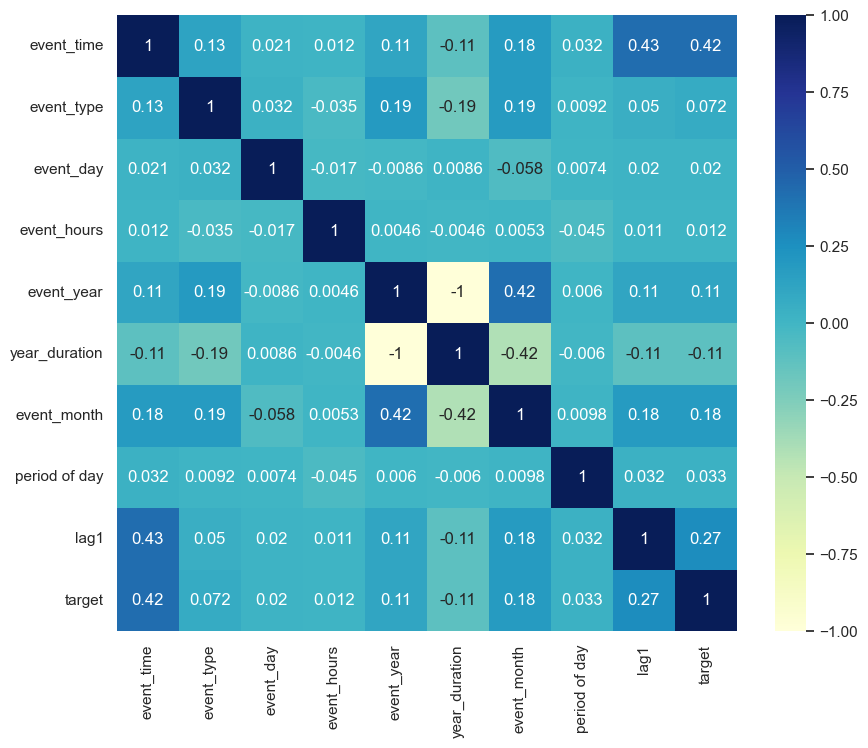

In [129]:
#Let's check for multi-colleniality and drop the column with same value close to each other
plt.figure(figsize=(10,8))
corre = train[col_features].corr()
sns.heatmap(corre, annot= True, cmap="YlGnBu")

In [130]:
#If there were any columns with correlation above 0.85 we would drop one of them. 
# In this case none has a correlation up to 0.85 

## USING TIME SERIES METHOD TO TRAIN MODELS

In [131]:
#Forecasting Using Supervised Machine Learning

In [132]:
# import libraries
import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, mean_absolute_percentage_error as mape
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# import linear models
from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor
import warnings
warnings.filterwarnings('ignore')

In [133]:
#Let's indicate the models we want to use
regressors = {
    'Linear Regression': LinearRegression(fit_intercept=True),
    'Ridge Regression': Ridge(0.5, fit_intercept=True),
    'Huber Regression': HuberRegressor(fit_intercept=True)}

In [134]:
#Let's create a funtion that will train all the model at one and the drop our target.
def train_model(train, test, regressor, reg_name):
    X_train, y_train  = train.drop(columns=["target"]), train["target"]
    X_test, y_test  = test.drop(columns=["target"]), test["target"]   

    print(f'training {reg_name} ...')
    
    regressor.fit(X_train, y_train) 
     
    yhat = regressor.predict(X_test)    
    mse_test = np.sqrt(mse(y_test, yhat))
    mape_test = mape(y_test, yhat)
    mae_test = mae(y_test, yhat)    
    residuals = y_test.values - yhat     
    
    model_metadata = {
        'Model Name': reg_name, 'Model': regressor, 
        'MAE': mae_test, 'MAPE': mape_test, 'MSE': mse_test,
        'yhat': yhat, 'resid': residuals, 'actual': y_test.values}
    return model_metadata


def train_different_models(train, test, regressors):
    results = []
    for reg_name, regressor in regressors.items():
        results.append(train_model(train,
                                   test,
                                   regressor,
                                   reg_name))
    return results


In [135]:
#let's call out the result of the trained models.
results = train_different_models(train, test, regressors)

training Linear Regression ...
training Ridge Regression ...
training Huber Regression ...


In [136]:
#To Evaluate
#MAE - Mean absolute error
#MAPE - Mean absolute percetage error 
#MSE - Mean sqaured error
cols = ['Model Name', 'MAE', 'MAPE', 'MSE']
results = pd.DataFrame(results)
results[cols].sort_values('MSE')

,Model Name,MAE,MAPE,MSE
0,Linear Regression,0.155900,1.824037,0.841671
1,Ridge Regression,0.155900,1.824036,0.841671
2,Huber Regression,0.330921,4.519915,0.996598


In [137]:
#Let's create a funtion that with give us the vitualization of the results od different models.
def plot_results(cols, results, data_name):
    for row in results[cols].iterrows():
        yhat, resid, actual, name = row[1]
        plt.title(f'{data_name} - {name}')
        plt.plot(actual, 'k--', alpha=0.5)
        plt.plot(yhat, 'k')
        plt.legend(['actual', 'forecast'])
        plot_acf(resid, zero=False, 
                 title=f'{data_name} - Autocorrelation')
        plt.show()

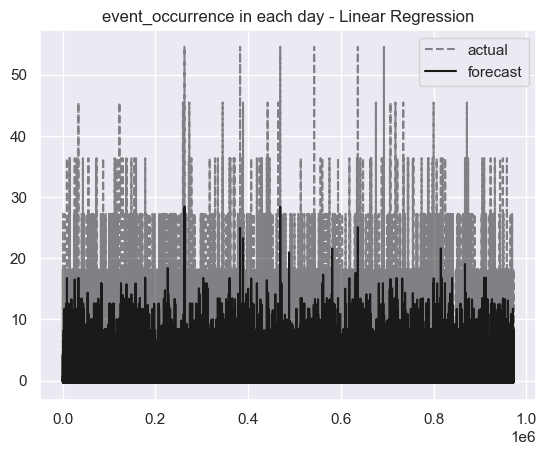

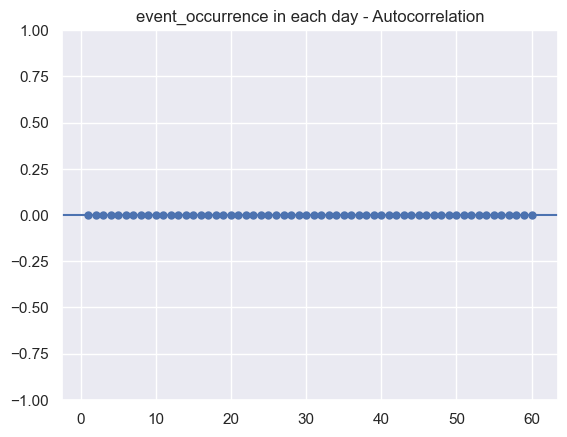

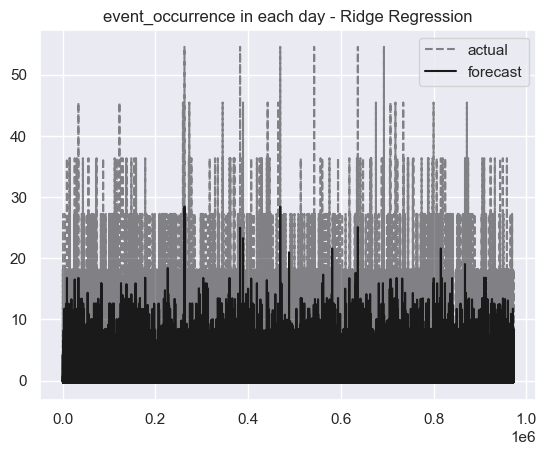

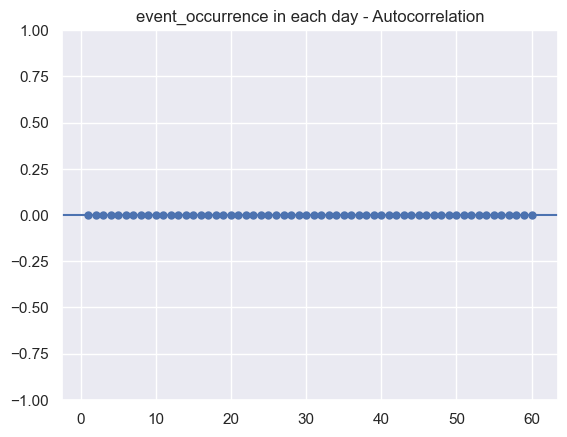

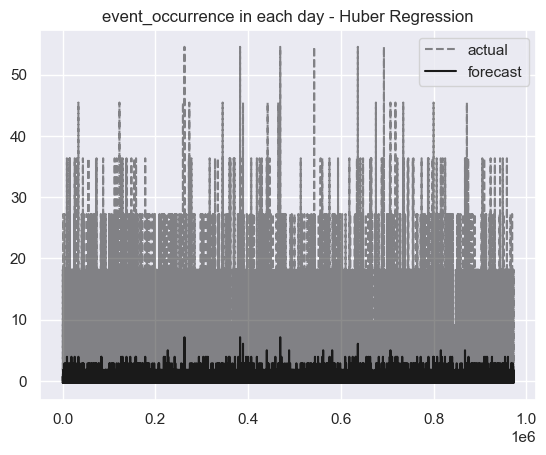

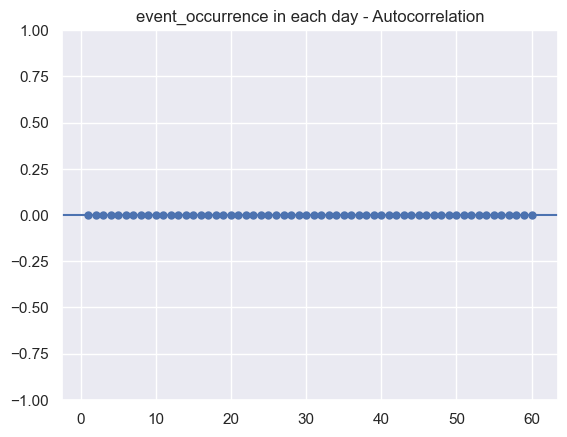

In [138]:
cols = ['yhat', 'resid', 'actual', 'Model Name']
plot_results(cols, results, 'event_occurrence in each day')


## USING THE MARCHINE LEARNING METHOD TO TRAIN THE MODEL

In [139]:
#Split to features and targets
y_train = train["target"]
X_train = train.drop(["target"],axis=1)
#Split to features and targets
y_test = test["target"]
X_test = test.drop(["target"],axis=1)

In [140]:
#Let's import the needed libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from matplotlib.image import imread
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


In [141]:
#Let's scale our data 
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [142]:
new_column

['event_time',
 'event_type',
 'event_day',
 'event_hours',
 'event_year',
 'year_duration',
 'event_month',
 'period of day',
 'lag1',
 'target']

In [143]:
cols = ['event_time',
 'event_type',
 'event_day',
 'event_hours',
 'event_year',
 'year_duration',
 'event_month',
 'period of day', 'lag1']
new_cols = cols

In [144]:
features = pd.DataFrame(X_train, columns = new_cols)
features

,event_time,event_type,event_day,event_hours,event_year,year_duration,event_month,period of day,lag1
0,-0.369497,-0.753946,0.876149,-0.614441,-3.110685,3.110685,-1.275961,0.814561,-0.368868
1,-0.369497,-0.753946,-0.216114,-0.003209,-3.110685,3.110685,-1.275961,1.042762,-0.368868
2,-0.369497,0.942469,-1.098846,-1.072865,0.321473,-0.321473,0.568700,-1.068943,-0.368868
3,-0.369497,-1.532989,-0.216114,-1.225673,0.321473,-0.321473,0.568700,-1.068943,-0.368868
4,-0.369497,0.942469,-2.190609,0.455214,0.321473,-0.321473,0.568700,1.042762,-0.368868
...,...,...,...,...,...,...,...,...,...
2269448,-0.369497,-1.317646,0.876149,1.372062,0.321473,-0.321473,1.056244,-0.435063,-0.368868
2269449,-0.369497,0.615720,0.371709,1.066446,0.321473,-0.321473,-0.292665,-1.540878,-0.368868
2269450,-0.369497,0.617705,-1.098846,1.219254,0.321473,-0.321473,1.056244,-0.435063,-0.368868
2269451,-0.369497,0.617705,-0.216114,1.066446,0.321473,-0.321473,1.056244,-1.540878,2.327598


In [145]:
features1 = pd.DataFrame(X_test, columns = new_cols)
features1

,event_time,event_type,event_day,event_hours,event_year,year_duration,event_month,period of day,lag1
0,-0.060966,0.617649,0.371640,-0.767106,0.320992,-0.320992,0.567285,0.813275,-0.060148
1,-0.060966,0.617649,-2.192432,0.608825,0.320992,-0.320992,1.055043,1.041437,-0.060148
2,-0.060966,0.615665,0.371640,0.761706,0.320992,-0.320992,0.567285,-1.541768,-0.060148
3,-0.060966,-1.395489,-0.216585,-1.684393,0.320992,-0.320992,-1.382526,-1.069913,-0.060148
4,-0.060966,0.942238,-2.192432,0.455944,0.320992,-0.320992,1.055043,1.041437,-0.060148
...,...,...,...,...,...,...,...,...,...
972618,-0.060966,-1.395489,-1.099922,-0.767106,0.320992,-0.320992,1.055043,0.813275,-0.060148
972619,-0.060966,-1.730900,0.782514,-0.308462,-3.115340,3.115340,-1.278188,0.813275,-0.060148
972620,-0.060966,-1.531885,0.876425,-1.072868,0.320992,-0.320992,0.567285,-1.069913,-0.060148
972621,-0.060966,0.615665,0.371640,-0.002700,0.320992,-0.320992,-0.294459,1.041437,-0.060148


In [146]:
decision_tree = DecisionTreeRegressor(max_depth = 10)
decision_tree.fit(X_train, y_train)
predictors = new_cols

corre = pd.Series(decision_tree.feature_importances_, predictors).sort_values(ascending=False)
corre.to_frame()

,0
event_time,0.777881
event_month,0.073491
event_type,0.068545
lag1,0.056852
event_hours,0.009447
event_day,0.008367
period of day,0.005245
event_year,0.000118
year_duration,0.000054


In [147]:
#Write a function for multiple model selection
def model_to_use(input_ml_algo):
    if input_ml_algo == 'DT':
        model = DecisionTreeRegressor()
    elif input_ml_algo == 'RF':
        model = RandomForestRegressor()
    elif input_ml_algo == 'XGBC':
        model = XGBRegressor()
    elif input_ml_algo == 'LGBMC':
        model = LGBMRegressor()
    elif input_ml_algo=='LR':
        model=LinearRegression()
    elif input_ml_algo=='KNN':
        model=KNeighborsRegressor()
    return model

In [148]:
#Let's create a funtion that will give us the vitualization of our trained models.
def evaluate(model):
    y_train_pred = model.predict(X_train) #Train (Already seen this)
    y_pred = model.predict(X_test) 
    
    print('Train r2 score: ', r2_score(y_train,y_train_pred))
    print('Test r2 score: ', r2_score(y_test, y_pred))


    print('train_mse1: ', mean_squared_error(y_train,y_train_pred))
    print('test_mse1: ', mean_squared_error(y_test,y_pred))  

    plt.subplots(figsize=(8,5))
    plt.scatter(y_test,y_pred)
    plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred, 1))(np.unique(y_test)),c='r')
    plt.title('Predicted vs Actual')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.grid()
    plt.show() 
    

Train r2 score:  0.19998116159229307
Test r2 score:  0.2915902847024361
train_mse1:  0.8000188384077073
test_mse1:  0.7084097152975639


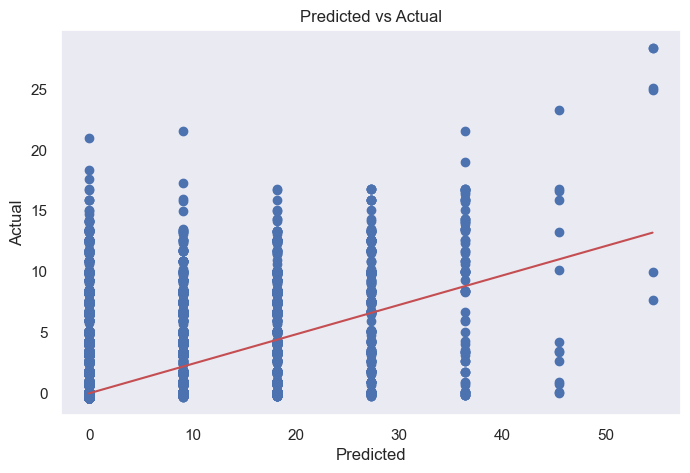

In [149]:
#Train Logistic regression model and evaluate
model = model_to_use("LR")
model.fit(X_train, y_train)
evaluate(model)

Train r2 score:  0.2745029117650465
Test r2 score:  0.253760262405459
train_mse1:  0.7254970882349537
test_mse1:  0.7462397375945409


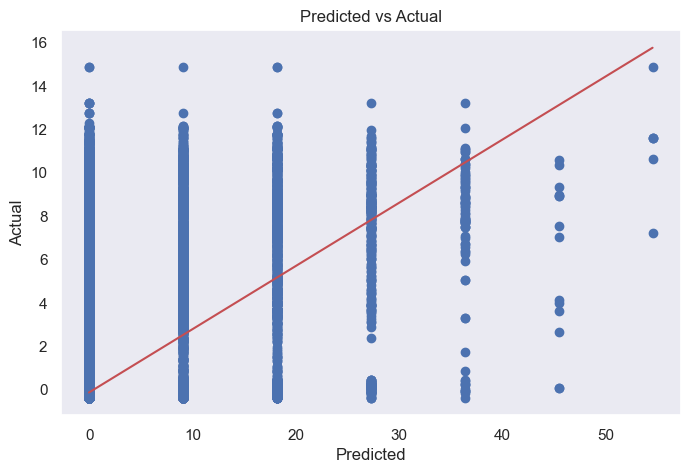

In [150]:
model = model_to_use("RF")
model.fit(X_train, y_train)
evaluate(model)

Train r2 score:  0.13217405949638095
Test r2 score:  0.16021010743127062
train_mse1:  0.8678259405036194
test_mse1:  0.8397898925687293


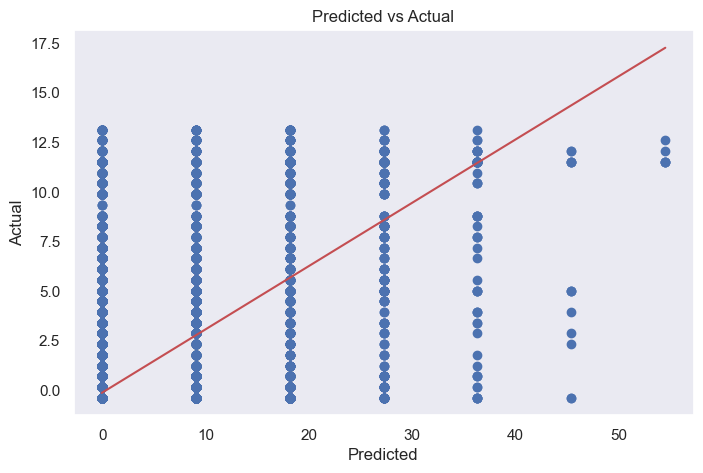

In [151]:
model = model_to_use("KNN")
model.fit(X_train, y_train)
evaluate(model)

Train r2 score:  0.276585930724944
Test r2 score:  0.17566192504799605
train_mse1:  0.7234140692750562
test_mse1:  0.8243380749520038


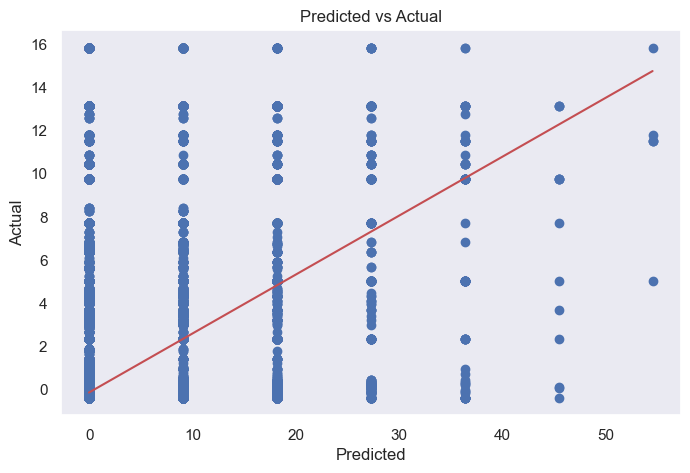

In [152]:
model = model_to_use("DT")
model.fit(X_train, y_train)
evaluate(model)

Train r2 score:  0.24730431125699393
Test r2 score:  0.2222577413314497
train_mse1:  0.7526956887430063
test_mse1:  0.7777422586685502


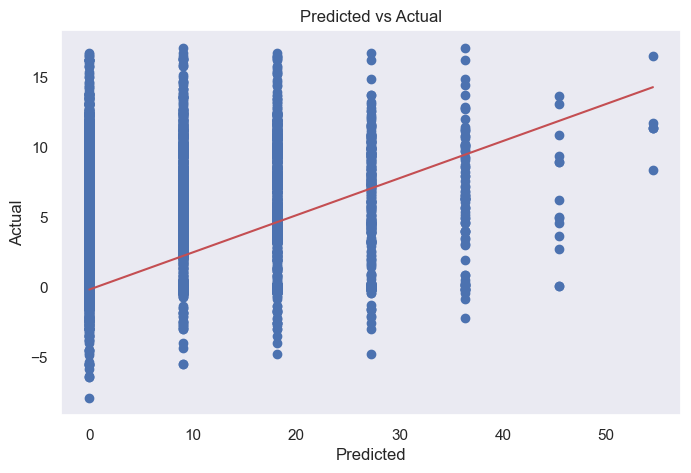

In [153]:
model = model_to_use("XGBC")
model.fit(X_train, y_train)
evaluate(model)

### Show another insight to the project

In [154]:
regressors = {
    'Linear Regression': LinearRegression(fit_intercept=True),
    'Ridge Regression': Ridge(0.5, fit_intercept=True),
    'Huber Regression': HuberRegressor(fit_intercept=True)}

In [155]:
def train_model(train, test, regressor, reg_name):
    X_train, y_train  = train.drop(columns=["event_time"]), train["event_time"]
    X_test, y_test  = test.drop(columns=["event_time"]), test["event_time"]   

    print(f'training {reg_name} ...')
    
    regressor.fit(X_train, y_train) 
     
    yhat = regressor.predict(X_test)    
    mse_test = np.sqrt(mse(y_test, yhat))
    mape_test = mape(y_test, yhat)
    mae_test = mae(y_test, yhat)    
    residuals = y_test.values - yhat     
    
    model_metadata = {
        'Model Name': reg_name, 'Model': regressor, 
        'MAE': mae_test, 'MAPE': mape_test, 'MSE': mse_test,
        'yhat': yhat, 'resid': residuals, 'actual': y_test.values}
    return model_metadata


def train_different_models(train, test, regressors):
    results = []
    for reg_name, regressor in regressors.items():
        results.append(train_model(train,
                                   test,
                                   regressor,
                                   reg_name))
    return results


In [156]:
results = train_different_models(train, test, regressors)

training Linear Regression ...
training Ridge Regression ...
training Huber Regression ...


In [157]:
#To Evaluate
#MAE - Mean absolute error
#MAPE - Mean absolute percetage error 
#MSE - Mean sqaured error
cols = ['Model Name', 'MAE', 'MAPE', 'MSE']
results = pd.DataFrame(results)
results[cols].sort_values('MSE')

,Model Name,MAE,MAPE,MSE
1,Ridge Regression,0.148120,1.768960,0.783207
2,Huber Regression,0.367895,5.018086,1.063360
0,Linear Regression,1.868630,30.111617,1.967215


In [158]:
def plot_results(cols, results, data_name):
    for row in results[cols].iterrows():
        yhat, resid, actual, name = row[1]
        plt.title(f'{data_name} - {name}')
        plt.plot(actual, 'k--', alpha=0.5)
        plt.plot(yhat, 'k')
        plt.legend(['actual', 'forecast'])
        plot_acf(resid, zero=False, 
                 title=f'{data_name} - Autocorrelation')
        plt.show()

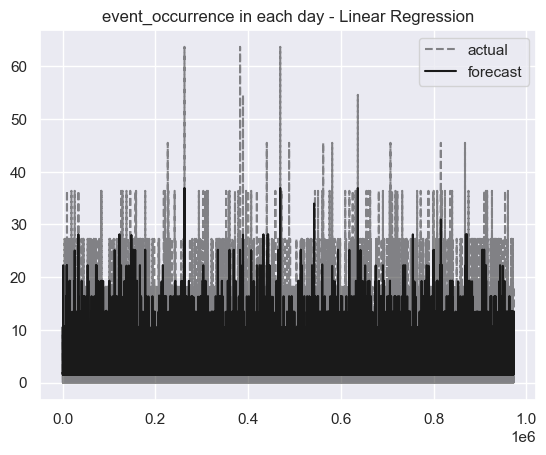

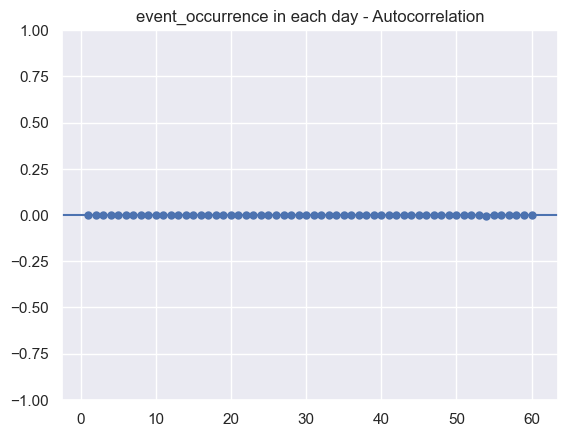

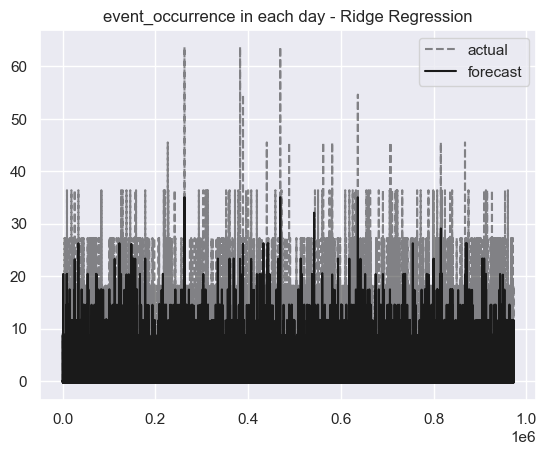

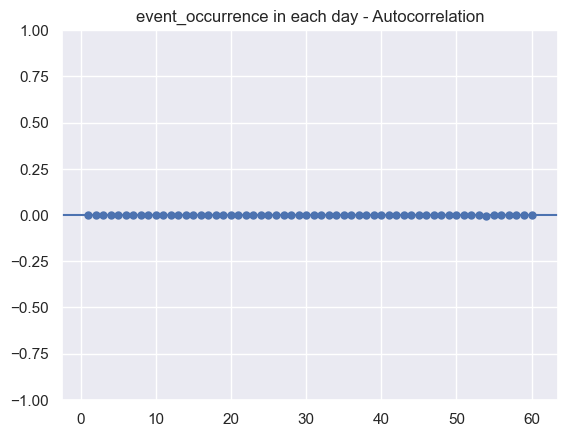

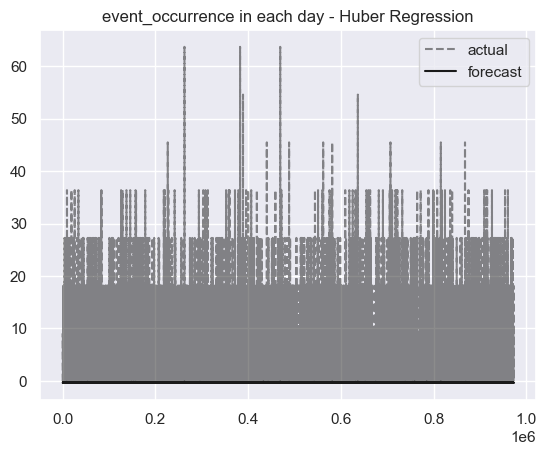

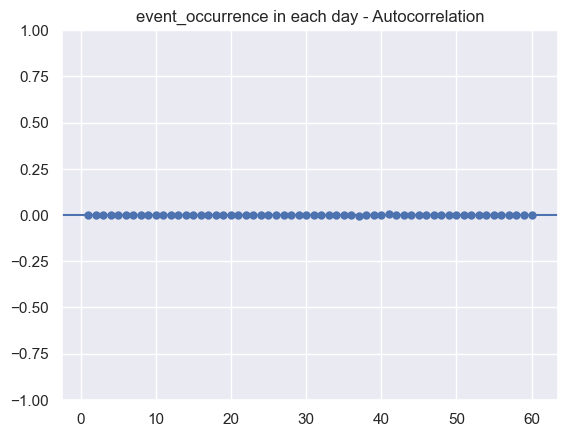

In [159]:
cols = ['yhat', 'resid', 'actual', 'Model Name']
plot_results(cols, results, 'event_occurrence in each day')


In [161]:
#Split to features and targets
y_train = train["event_time"]
X_train = train.drop(["event_time"],axis=1)
#Split to features and targets
y_test = test["event_time"]
X_test = test.drop(["event_time"],axis=1)

In [162]:
#scale data 
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [163]:
new_column

['event_time',
 'event_type',
 'event_day',
 'event_hours',
 'event_year',
 'year_duration',
 'event_month',
 'period of day',
 'lag1',
 'target']

In [164]:
cols = ['event_type', 'event_day', 'event_hours', 'event_year', 'year_duration', 'event_month',
 'period of day', 'lag1', 'target']
new_cols = cols

In [165]:
features = pd.DataFrame(X_train, columns = new_cols)
features

,event_type,event_day,event_hours,event_year,year_duration,event_month,period of day,lag1,target
0,-0.753946,0.876149,-0.614441,-3.110685,3.110685,-1.275961,0.814561,-0.368868,-0.368895
1,-0.753946,-0.216114,-0.003209,-3.110685,3.110685,-1.275961,1.042762,-0.368868,-0.368895
2,0.942469,-1.098846,-1.072865,0.321473,-0.321473,0.568700,-1.068943,-0.368868,-0.368895
3,-1.532989,-0.216114,-1.225673,0.321473,-0.321473,0.568700,-1.068943,-0.368868,-0.368895
4,0.942469,-2.190609,0.455214,0.321473,-0.321473,0.568700,1.042762,-0.368868,-0.368895
...,...,...,...,...,...,...,...,...,...
2269448,-1.317646,0.876149,1.372062,0.321473,-0.321473,1.056244,-0.435063,-0.368868,-0.368895
2269449,0.615720,0.371709,1.066446,0.321473,-0.321473,-0.292665,-1.540878,-0.368868,2.332307
2269450,0.617705,-1.098846,1.219254,0.321473,-0.321473,1.056244,-0.435063,-0.368868,2.332307
2269451,0.617705,-0.216114,1.066446,0.321473,-0.321473,1.056244,-1.540878,2.327598,-0.368895


In [166]:
features1 = pd.DataFrame(X_test, columns = new_cols)
features1

,event_type,event_day,event_hours,event_year,year_duration,event_month,period of day,lag1,target
0,0.617649,0.371640,-0.767106,0.320992,-0.320992,0.567285,0.813275,-0.060148,-0.060477
1,0.617649,-2.192432,0.608825,0.320992,-0.320992,1.055043,1.041437,-0.060148,-0.060477
2,0.615665,0.371640,0.761706,0.320992,-0.320992,0.567285,-1.541768,-0.060148,-0.060477
3,-1.395489,-0.216585,-1.684393,0.320992,-0.320992,-1.382526,-1.069913,-0.060148,-0.060477
4,0.942238,-2.192432,0.455944,0.320992,-0.320992,1.055043,1.041437,-0.060148,-0.060477
...,...,...,...,...,...,...,...,...,...
972618,-1.395489,-1.099922,-0.767106,0.320992,-0.320992,1.055043,0.813275,-0.060148,-0.060477
972619,-1.730900,0.782514,-0.308462,-3.115340,3.115340,-1.278188,0.813275,-0.060148,-0.060477
972620,-1.531885,0.876425,-1.072868,0.320992,-0.320992,0.567285,-1.069913,-0.060148,-0.060477
972621,0.615665,0.371640,-0.002700,0.320992,-0.320992,-0.294459,1.041437,-0.060148,-0.060477


In [167]:
#Write a function for multiple model selection
def model_to_use(input_ml_algo):
    if input_ml_algo == 'DT':
        model = DecisionTreeRegressor()
    elif input_ml_algo == 'RF':
        model = RandomForestRegressor()
    elif input_ml_algo == 'XGBC':
        model = XGBRegressor()
    elif input_ml_algo == 'LGBMC':
        model = LGBMRegressor()
    elif input_ml_algo=='LR':
        model=LinearRegression()
    elif input_ml_algo=='KNN':
        model=KNeighborsRegressor()
    return model

In [168]:
def evaluate(model):
    y_train_pred = model.predict(X_train) #Train (Already seen this)
    y_pred = model.predict(X_test) 
    
    print('Train r2 score: ', r2_score(y_train,y_train_pred))
    print('Test r2 score: ', r2_score(y_test, y_pred))


    print('train_mse1: ', mean_squared_error(y_train,y_train_pred))
    print('test_mse1: ', mean_squared_error(y_test,y_pred))  

    plt.subplots(figsize=(8,5))
    plt.scatter(y_test,y_pred)
    plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred, 1))(np.unique(y_test)),c='r')
    plt.title('Predicted vs Actual')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.grid()
    plt.show() 
    

Train r2 score:  0.29399123545946104
Test r2 score:  0.3865172252902749
train_mse1:  0.7060087645405394
test_mse1:  0.6134827747097255


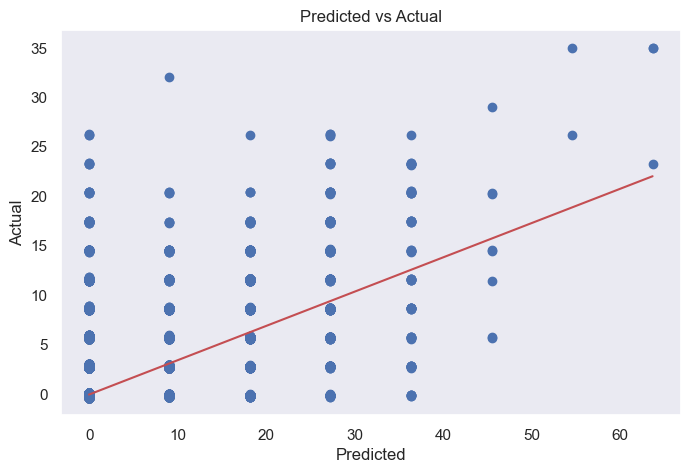

In [169]:
#Train Logistic regression model and evaluate
model = model_to_use("LR")
model.fit(X_train, y_train)
evaluate(model)

Train r2 score:  0.44012018099277983
Test r2 score:  0.3411789933206706
train_mse1:  0.5598798190072205
test_mse1:  0.6588210066793297


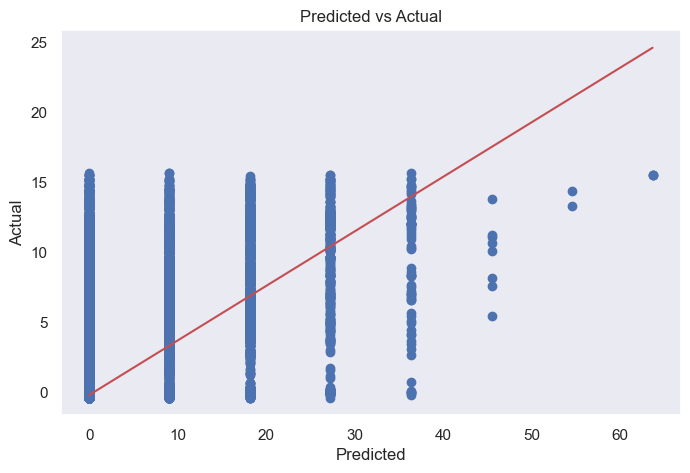

In [170]:
model = model_to_use("RF")
model.fit(X_train, y_train)
evaluate(model)

Train r2 score:  0.31916286356672974
Test r2 score:  0.2373143472475121
train_mse1:  0.6808371364332707
test_mse1:  0.7626856527524882


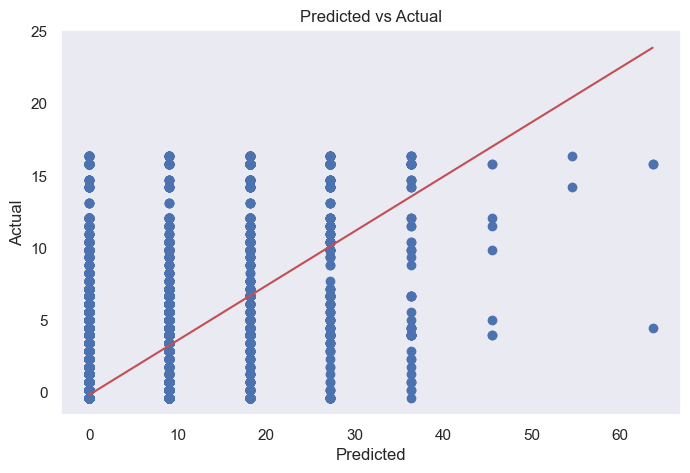

In [171]:
model = model_to_use("KNN")
model.fit(X_train, y_train)
evaluate(model)

Train r2 score:  0.44206731018570566
Test r2 score:  0.28205919017622527
train_mse1:  0.5579326898142947
test_mse1:  0.7179408098237751


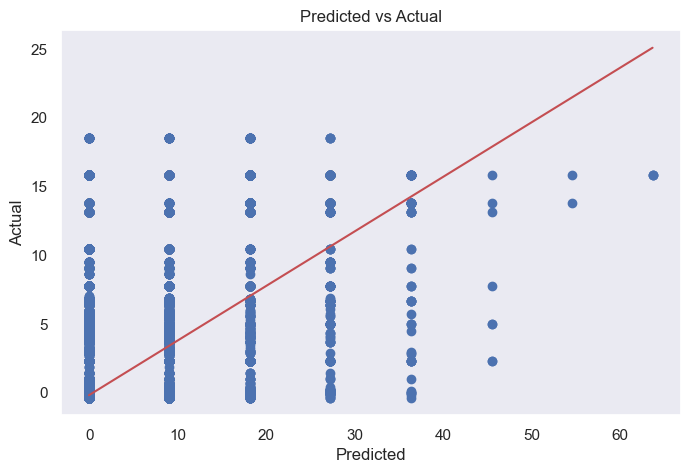

In [172]:
model = model_to_use("DT")
model.fit(X_train, y_train)
evaluate(model)

Train r2 score:  0.419043034552544
Test r2 score:  0.3323277801007639
train_mse1:  0.5809569654474563
test_mse1:  0.6676722198992364


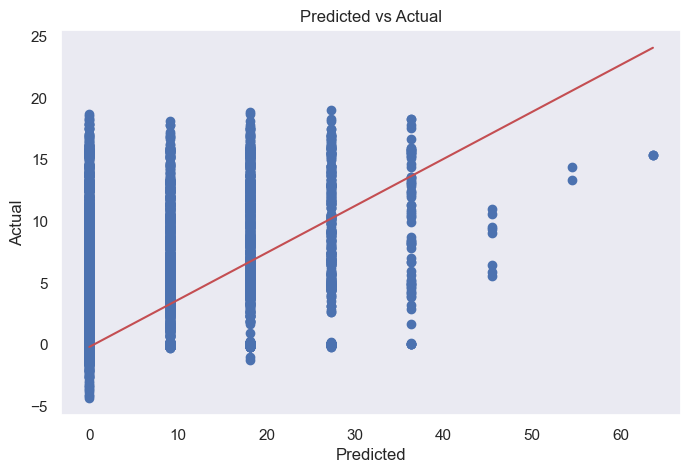

In [173]:
model = model_to_use("XGBC")
model.fit(X_train, y_train)
evaluate(model)